In [72]:
import pandas as pd

In [154]:
import sys
print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [73]:
df=pd.read_csv('LoanData_Bondora.csv')
print(df.shape)

C:\Users\30698\AppData\Local\Temp\ipykernel_1484\3580282241.py:2: DtypeWarning: Columns (34,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('LoanData_Bondora.csv')


(179235, 112)


In [74]:
#looking at the counts of target variable
status_counts = df['Status'].value_counts()

print(status_counts)

Late       68574
Current    57774
Repaid     52887
Name: Status, dtype: int64


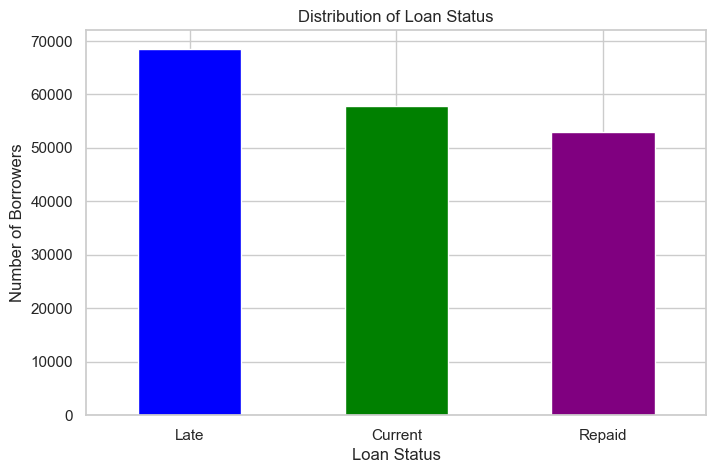

In [75]:
import matplotlib.pyplot as plt
# Create a bar plot for the status counts
plt.figure(figsize=(8, 5))  # Set the figure size
status_counts.plot(kind='bar', color=['blue', 'green', 'purple'])  # Set custom colors for each status
plt.xlabel('Loan Status')  # Label for X-axis
plt.ylabel('Number of Borrowers')  # Label for Y-axis
plt.title('Distribution of Loan Status')  # Title of the plot
plt.xticks(rotation=0)  # Set the rotation of X-axis labels to 0 for better readability
# Save the figure
plt.savefig('loan_status_distribution_original.png')  # Saves the plot as a PNG file
plt.show()  # Display the plot

In [76]:
#delete all rows with current status
df = df[df['Status'] != 'Current']

In [77]:
value_counts=df['Status'].value_counts()
print(value_counts)


Late      68574
Repaid    52887
Name: Status, dtype: int64


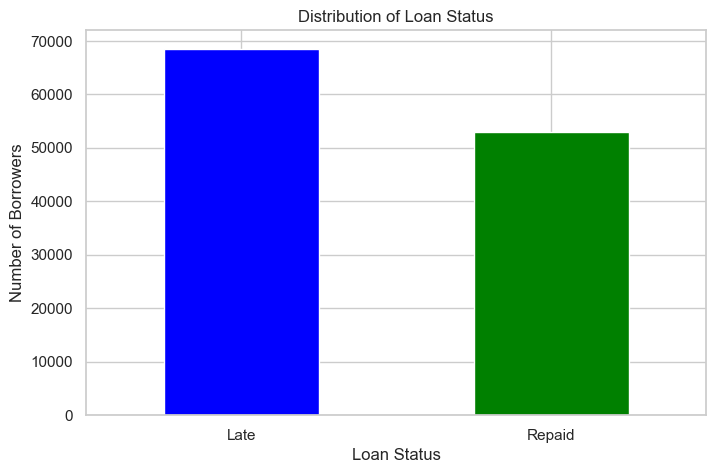

In [78]:
import matplotlib.pyplot as plt
# Create a bar plot for the status counts
plt.figure(figsize=(8, 5))  
value_counts.plot(kind='bar', color=['blue', 'green', 'purple'])  
plt.xlabel('Loan Status')  
plt.ylabel('Number of Borrowers') 
plt.title('Distribution of Loan Status')  
plt.xticks(rotation=0)  
# Save the figure
plt.savefig('loan_status_distribution_after_removing_current.png')  
plt.show()  

In [79]:
df.shape

(121461, 112)

In [80]:
# Print and save the column names to a text file
column_names = df.columns.tolist()
print(column_names)  

with open('column_names.txt', 'w') as f:
    for column in column_names:
        f.write("%s\n" % column)

print("Column names have been saved to column_names.txt.")

['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual', 'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate', 'LoanDate', 'ContractEndDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age', 'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus', 'NrOfDependants', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'EmploymentPosition', 'WorkExperience', 'OccupationArea', 'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPayme

In [81]:
#missing values checking
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    print(f"{column}: {missing_values_count} missing values")

ReportAsOfEOD: 0 missing values
LoanId: 0 missing values
LoanNumber: 0 missing values
ListedOnUTC: 0 missing values
BiddingStartedOn: 0 missing values
BidsPortfolioManager: 0 missing values
BidsApi: 0 missing values
BidsManual: 0 missing values
UserName: 0 missing values
NewCreditCustomer: 0 missing values
LoanApplicationStartedDate: 0 missing values
LoanDate: 0 missing values
ContractEndDate: 42470 missing values
FirstPaymentDate: 0 missing values
MaturityDate_Original: 0 missing values
MaturityDate_Last: 0 missing values
ApplicationSignedHour: 0 missing values
ApplicationSignedWeekday: 0 missing values
VerificationType: 50 missing values
LanguageCode: 0 missing values
Age: 0 missing values
DateOfBirth: 121461 missing values
Gender: 45 missing values
Country: 0 missing values
AppliedAmount: 0 missing values
Amount: 0 missing values
Interest: 0 missing values
LoanDuration: 0 missing values
MonthlyPayment: 6660 missing values
County: 121461 missing values
City: 121461 missing values
Use

In [82]:
#list of variables you want to keep
variables_to_keep = [
    'Age', 'Country', 'MaritalStatus', 'NrOfDependants', 'Education',
    'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'IncomeTotal', 'DebtToIncome',
    'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'VerificationType',
    'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
    'ExistingLiabilities', 'LiabilitiesTotal', 'NewCreditCustomer', 'Status', 'EmploymentPosition','WorkExperience', 'OccupationArea', 'HomeOwnershipType', 'FreeCash']


# only the selected variables
df = df[variables_to_keep]


df.to_csv('Filtered_LoanData.csv', index=False)

print(df.head())

   Age Country  MaritalStatus NrOfDependants  Education  EmploymentStatus  \
0   53      EE            2.0            0.0        4.0               6.0   
1   50      EE            2.0            0.0        5.0               5.0   
2   44      EE            4.0            1.0        4.0               5.0   
3   42      ES            1.0            0.0        2.0               3.0   
4   34      ES            4.0            2.0        4.0               6.0   

  EmploymentDurationCurrentEmployer  IncomeTotal  DebtToIncome  AppliedAmount  \
0                    MoreThan5Years        354.0         26.29         2125.0   
1                    MoreThan5Years        900.0         30.58         3000.0   
2                        UpTo3Years       1200.0         26.71        10630.0   
3                        UpTo5Years        863.0          7.36         1500.0   
4                         UpTo1Year        697.0         36.04         1595.0   

   ...  PreviousRepaymentsBeforeLoan  ExistingLiab

In [83]:
df.shape

(121461, 28)

In [84]:
#number of missing values in each column
missing_values = df.isnull().sum()

#percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Missing Values Count:\n", missing_values)
print("\nMissing Values Percentage:\n", missing_percentage)

Missing Values Count:
 Age                                       0
Country                                   0
MaritalStatus                            50
NrOfDependants                        87342
Education                                50
EmploymentStatus                        202
EmploymentDurationCurrentEmployer      1026
IncomeTotal                               0
DebtToIncome                             50
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                         6660
UseOfLoan                                 0
VerificationType                         50
NoOfPreviousLoansBeforeLoan               8
AmountOfPreviousLoansBeforeLoan           8
PreviousRepaymentsBeforeLoan          39565
ExistingLiabilities                       0
LiabilitiesTotal                          0
NewCreditCustomer                         0
Status   

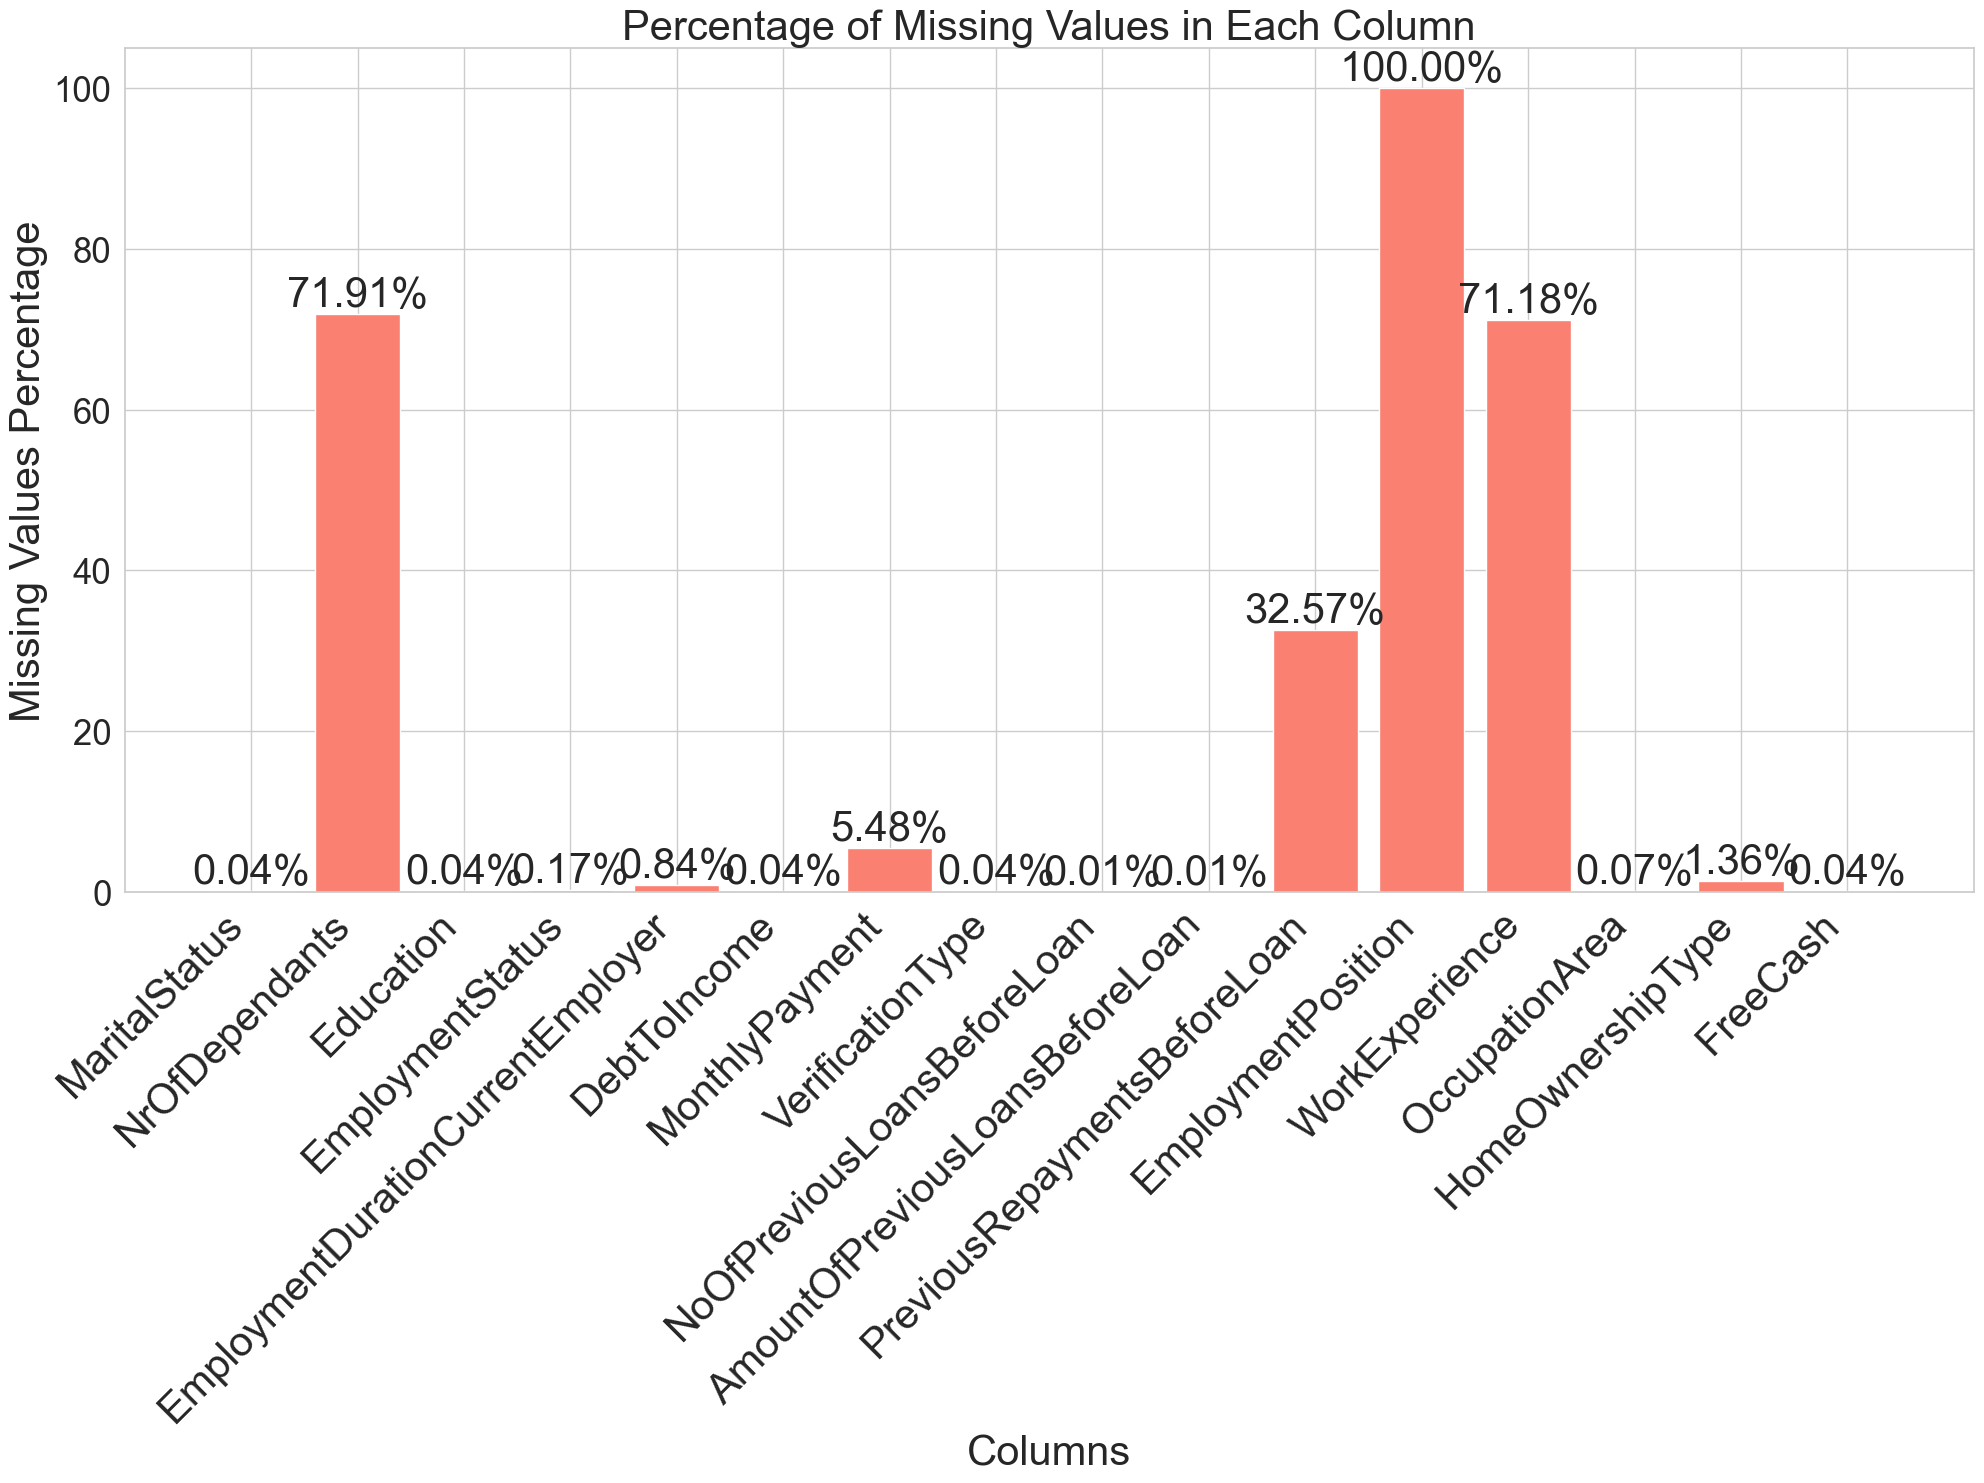

In [85]:
import matplotlib.pyplot as plt
missing_percentage = missing_percentage[missing_percentage > 0]
# visualize them
plt.figure(figsize=(20, 15))  
bars = plt.bar(missing_percentage.index, missing_percentage.values, color='salmon')
plt.title('Percentage of Missing Values in Each Column', fontsize=30)
plt.xlabel('Columns',fontsize=30)
plt.ylabel('Missing Values Percentage', fontsize=30)
plt.xticks(rotation=45, ha='right', fontsize=30) 
plt.yticks(fontsize=25)
# Adding text annotations above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=30)


plt.subplots_adjust(bottom=0.15, top=10.18)  
plt.tight_layout()
plt.savefig("percentage_missing_each_column.png")
plt.show()

In [86]:
#columns with very high missing values
column_drop=['NrOfDependants', 'EmploymentPosition', 'WorkExperience']
df.drop(columns=column_drop, inplace=True)

In [87]:
#number of missing values in each column
missing_values = df.isnull().sum()

#percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Missing Values Count:\n", missing_values)

Missing Values Count:
 Age                                      0
Country                                  0
MaritalStatus                           50
Education                               50
EmploymentStatus                       202
EmploymentDurationCurrentEmployer     1026
IncomeTotal                              0
DebtToIncome                            50
AppliedAmount                            0
Amount                                   0
Interest                                 0
LoanDuration                             0
MonthlyPayment                        6660
UseOfLoan                                0
VerificationType                        50
NoOfPreviousLoansBeforeLoan              8
AmountOfPreviousLoansBeforeLoan          8
PreviousRepaymentsBeforeLoan         39565
ExistingLiabilities                      0
LiabilitiesTotal                         0
NewCreditCustomer                        0
Status                                   0
OccupationArea                 

In [88]:
var=['Gender', 'Country', 'MaritalStatus', 'Education', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
     'UseOfLoan', 'VerificationType', 'NoOfPreviousLoansBeforeLoan', 'ExistingLiabilities', 'NewCreditCustomer','OccupationArea','HomeOwnershipType']
 
# Print unique values for each specified column
for column in var:
    if column in df.columns: 
        print(f"Unique values in '{column}': {df[column].unique()}")
    else:
        print(f"'{column}' is not a column in the DataFrame.")    

'Gender' is not a column in the DataFrame.
Unique values in 'Country': ['EE' 'ES' 'FI' 'SK']
Unique values in 'MaritalStatus': [ 2.  4.  1.  3.  5. nan  0. -1.]
Unique values in 'Education': [ 4.  5.  2.  3.  1. nan  0. -1.]
Unique values in 'EmploymentStatus': [ 6.  5.  3.  2.  4. nan  0. -1.]
Unique values in 'EmploymentDurationCurrentEmployer': ['MoreThan5Years' 'UpTo3Years' 'UpTo5Years' 'UpTo1Year' 'UpTo2Years'
 'UpTo4Years' 'TrialPeriod' nan 'Retiree' 'Other']
Unique values in 'UseOfLoan': [  2   3   7   8   6   0   4   1   5 101 104 102 110 108 106 107  -1]
Unique values in 'VerificationType': [ 4.  1.  3.  2. nan  0.]
Unique values in 'NoOfPreviousLoansBeforeLoan': [ 1.  0.  2.  3.  6.  4.  5.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. nan 25. 26. 27.]
Unique values in 'ExistingLiabilities': [ 8  4  7  1  5  2  9 10 12  3  6 15 17 11 13 18 16 14 19  0 24 20 22 25
 27 29 21 23 26 36 30 28 31 35 32 33 34 39 40]
Unique values in 'NewCreditCustomer': [F

In [89]:
#maritalstatus
#value counts
value_counts = df['MaritalStatus'].value_counts(dropna=False)
import numpy as np

print("Count of '-1' in MaritalStatus:", value_counts.get(-1, 0))
print("Count of '0' in MaritalStatus:", value_counts.get(0, 0))
print("Count of 'NaN' in MaritalStatus:", value_counts.get(pd.NA, value_counts.get(pd.NaT, value_counts.get(np.nan, 0))))



Count of '-1' in MaritalStatus: 86395
Count of '0' in MaritalStatus: 8
Count of 'NaN' in MaritalStatus: 50


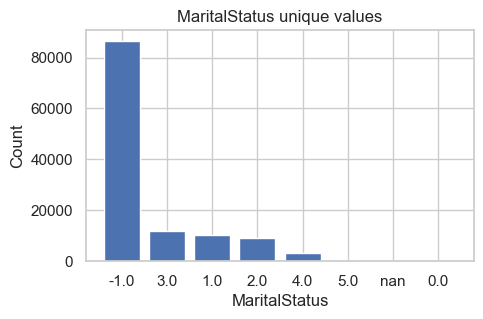

In [90]:
import matplotlib.pyplot as plt


#value counts
value_counts = df['MaritalStatus'].value_counts(dropna=False)

# Plot
plt.figure(figsize=(5, 3))
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('MaritalStatus unique values')
plt.savefig("Marital status distribution.png")
# Show the plot
plt.show()

In [91]:
#many undefined values. I will drop it
df=df.drop(columns=['MaritalStatus'])

Count of '-1' in Education: 149
Count of '0' in Education: 8
Count of 'NaN' in Education: 50


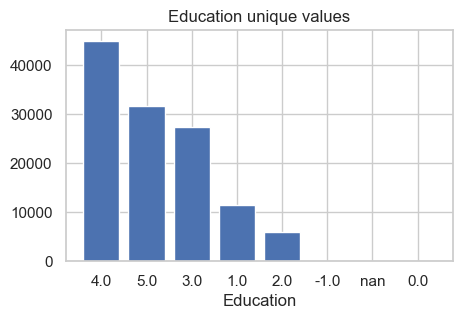

In [92]:
#education
# value counts
value_counts = df['Education'].value_counts(dropna=False)
import numpy as np
# Print counts for specific values
print("Count of '-1' in Education:", value_counts.get(-1, 0))
print("Count of '0' in Education:", value_counts.get(0, 0))
print("Count of 'NaN' in Education:", value_counts.get(pd.NA, value_counts.get(pd.NaT, value_counts.get(np.nan, 0))))
# Plot
plt.figure(figsize=(5, 3))
plt.bar(value_counts.index.astype(str), value_counts.values)

plt.xlabel('Education')

plt.title('Education unique values')
plt.savefig("Education distribution.png")
# Show the plot
plt.show()


In [93]:
import numpy as np

# Filter data for 'late' status
late_df = df[df['Status'] == 'Late']
late_value_counts = late_df['Education'].value_counts(dropna=False)

# Filter data for 'repaid' status
repaid_df = df[df['Status'] == 'Repaid']
repaid_value_counts = repaid_df['Education'].value_counts(dropna=False)

#specific values when status is 'late'
print("When Status is 'late':")
print("Count of '-1' in Education:", late_value_counts.get(-1, 0))
print("Count of '0' in Education:", late_value_counts.get(0, 0))
print("Count of 'NaN' in Education:", late_value_counts.get(pd.NA, late_value_counts.get(pd.NaT, late_value_counts.get(np.nan, 0))))

# specific values when status is 'repaid'
print("When Status is 'repaid':")
print("Count of '-1' in Education:", repaid_value_counts.get(-1, 0))
print("Count of '0' in Education:", repaid_value_counts.get(0, 0))
print("Count of 'NaN' in Education:", repaid_value_counts.get(pd.NA, repaid_value_counts.get(pd.NaT, repaid_value_counts.get(np.nan, 0))))


When Status is 'late':
Count of '-1' in Education: 117
Count of '0' in Education: 0
Count of 'NaN' in Education: 0
When Status is 'repaid':
Count of '-1' in Education: 32
Count of '0' in Education: 8
Count of 'NaN' in Education: 50


In [94]:
#ndexes of rows where 'Education' is -1, 0, or NaN
indexes_to_drop = df[df['Education'].isin([-1, 0]) | df['Education'].isna()].index

# Drop these rows 
df = df.drop(indexes_to_drop)



print("New DataFrame shape after removal:", df.shape)

New DataFrame shape after removal: (121254, 24)


In [95]:
#employmentstatus
#value counts
value_counts = df['EmploymentStatus'].value_counts(dropna=False)
import numpy as np

print("Count of '-1' in EmploymentStatus:", value_counts.get(-1, 0))
print("Count of '0' in EmploymentStatus:", value_counts.get(0, 0))
print("Count of 'NaN' in EmploymentStatus:", value_counts.get(pd.NA, value_counts.get(pd.NaT, value_counts.get(np.nan, 0))))

Count of '-1' in EmploymentStatus: 86246
Count of '0' in EmploymentStatus: 24
Count of 'NaN' in EmploymentStatus: 152


In [96]:
import numpy as np

# Filter data for 'late' status
late_df = df[df['Status'] == 'Late']
late_value_counts = late_df['EmploymentStatus'].value_counts(dropna=False)

# Filter data for 'repaid' status
repaid_df = df[df['Status'] == 'Repaid']
repaid_value_counts = repaid_df['EmploymentStatus'].value_counts(dropna=False)


print("When Status is 'late':")
print("Count of '-1' in EmploymentStatus:", late_value_counts.get(-1, 0))
print("Count of '0' in EmploymentStatus:", late_value_counts.get(0, 0))
print("Count of 'NaN' in EmploymentStatus:", late_value_counts.get(pd.NA, late_value_counts.get(pd.NaT, late_value_counts.get(np.nan, 0))))


print("When Status is 'repaid':")
print("Count of '-1' in EmploymentStatus:", repaid_value_counts.get(-1, 0))
print("Count of '0' in EmploymentStatus:", repaid_value_counts.get(0, 0))
print("Count of 'NaN' in EmploymentStatus:", repaid_value_counts.get(pd.NA, repaid_value_counts.get(pd.NaT, repaid_value_counts.get(np.nan, 0))))




When Status is 'late':
Count of '-1' in EmploymentStatus: 54440
Count of '0' in EmploymentStatus: 13
Count of 'NaN' in EmploymentStatus: 18
When Status is 'repaid':
Count of '-1' in EmploymentStatus: 31806
Count of '0' in EmploymentStatus: 11
Count of 'NaN' in EmploymentStatus: 134


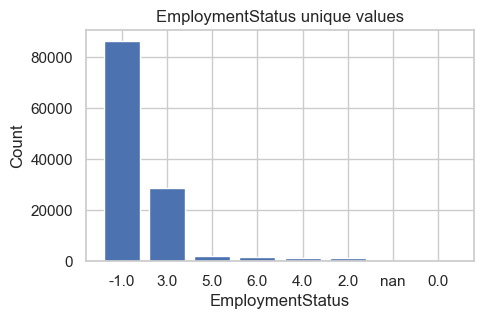

In [97]:
# Plot
plt.figure(figsize=(5, 3))
plt.bar(value_counts.index.astype(str), value_counts.values)

plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.title('EmploymentStatus unique values')
plt.savefig("EmploymentStatus distribution.png")
# Show the plot
plt.show()


In [98]:
df=df.drop(columns=['EmploymentStatus'])

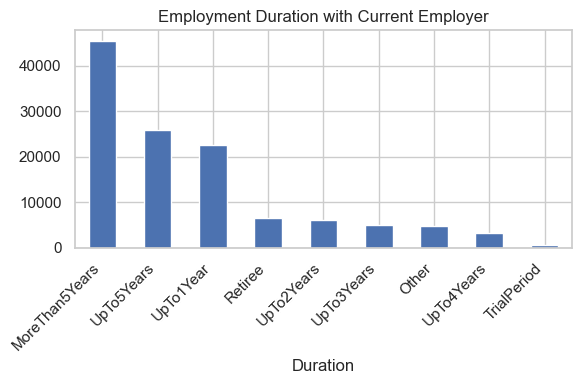

In [99]:
#EmploymentDurationCurrentEmployer

counts = df['EmploymentDurationCurrentEmployer'].value_counts()

plt.figure(figsize=(6, 4))  
ax = counts.plot(kind='bar')
ax.set_title('Employment Duration with Current Employer')
ax.set_xlabel('Duration')

plt.xticks(rotation=45, ha='right') 

plt.tight_layout()  
plt.savefig("EmploymentDuration_with_current_employer.png")
plt.show()

In [100]:
#EmploymentDurationCurrentEmployer, drop rows

# Drop rows where 'EmploymentDurationCurrentEmployer' has NaN values
df= df.dropna(subset=['EmploymentDurationCurrentEmployer'])

print("Original DataFrame shape:", df.shape)


Original DataFrame shape: (120432, 23)


In [101]:
#UseOFloan
count_minus_1 = (df['UseOfLoan'] == -1).sum()
print(count_minus_1)


86246


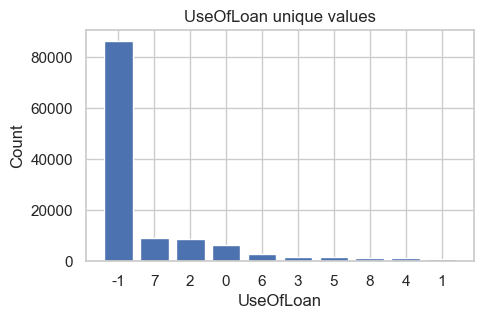

In [102]:
counts = df['UseOfLoan'].value_counts()

# Plot
plt.figure(figsize=(5, 3))
plt.bar(counts.index.astype(str), counts.values)

plt.xlabel('UseOfLoan')

plt.ylabel('Count')
plt.title('UseOfLoan unique values')
plt.savefig("UseOfLoan.png")
# Show the plot
plt.show()


In [103]:
df=df.drop(columns=['UseOfLoan'])

In [104]:
#after dropping rows verification type has not any missing values or 0 values.

In [105]:
#verificationType
#missing values in the 'VerificationType' column
missing_values_count = df['VerificationType'].isna().sum()

#how many times '0' appears in the 'VerificationType' column?
not_set_count = (df['VerificationType'] == 0).sum()

print("Number of missing values in 'VerificationType':", missing_values_count)
print("Number of 'Not set' (0) values in 'VerificationType':", not_set_count)

Number of missing values in 'VerificationType': 0
Number of 'Not set' (0) values in 'VerificationType': 0


In [106]:
# Drop rows where 'NoOfPreviousLoansBeforeLoan' has NaN values
df= df.dropna(subset=['NoOfPreviousLoansBeforeLoan'])

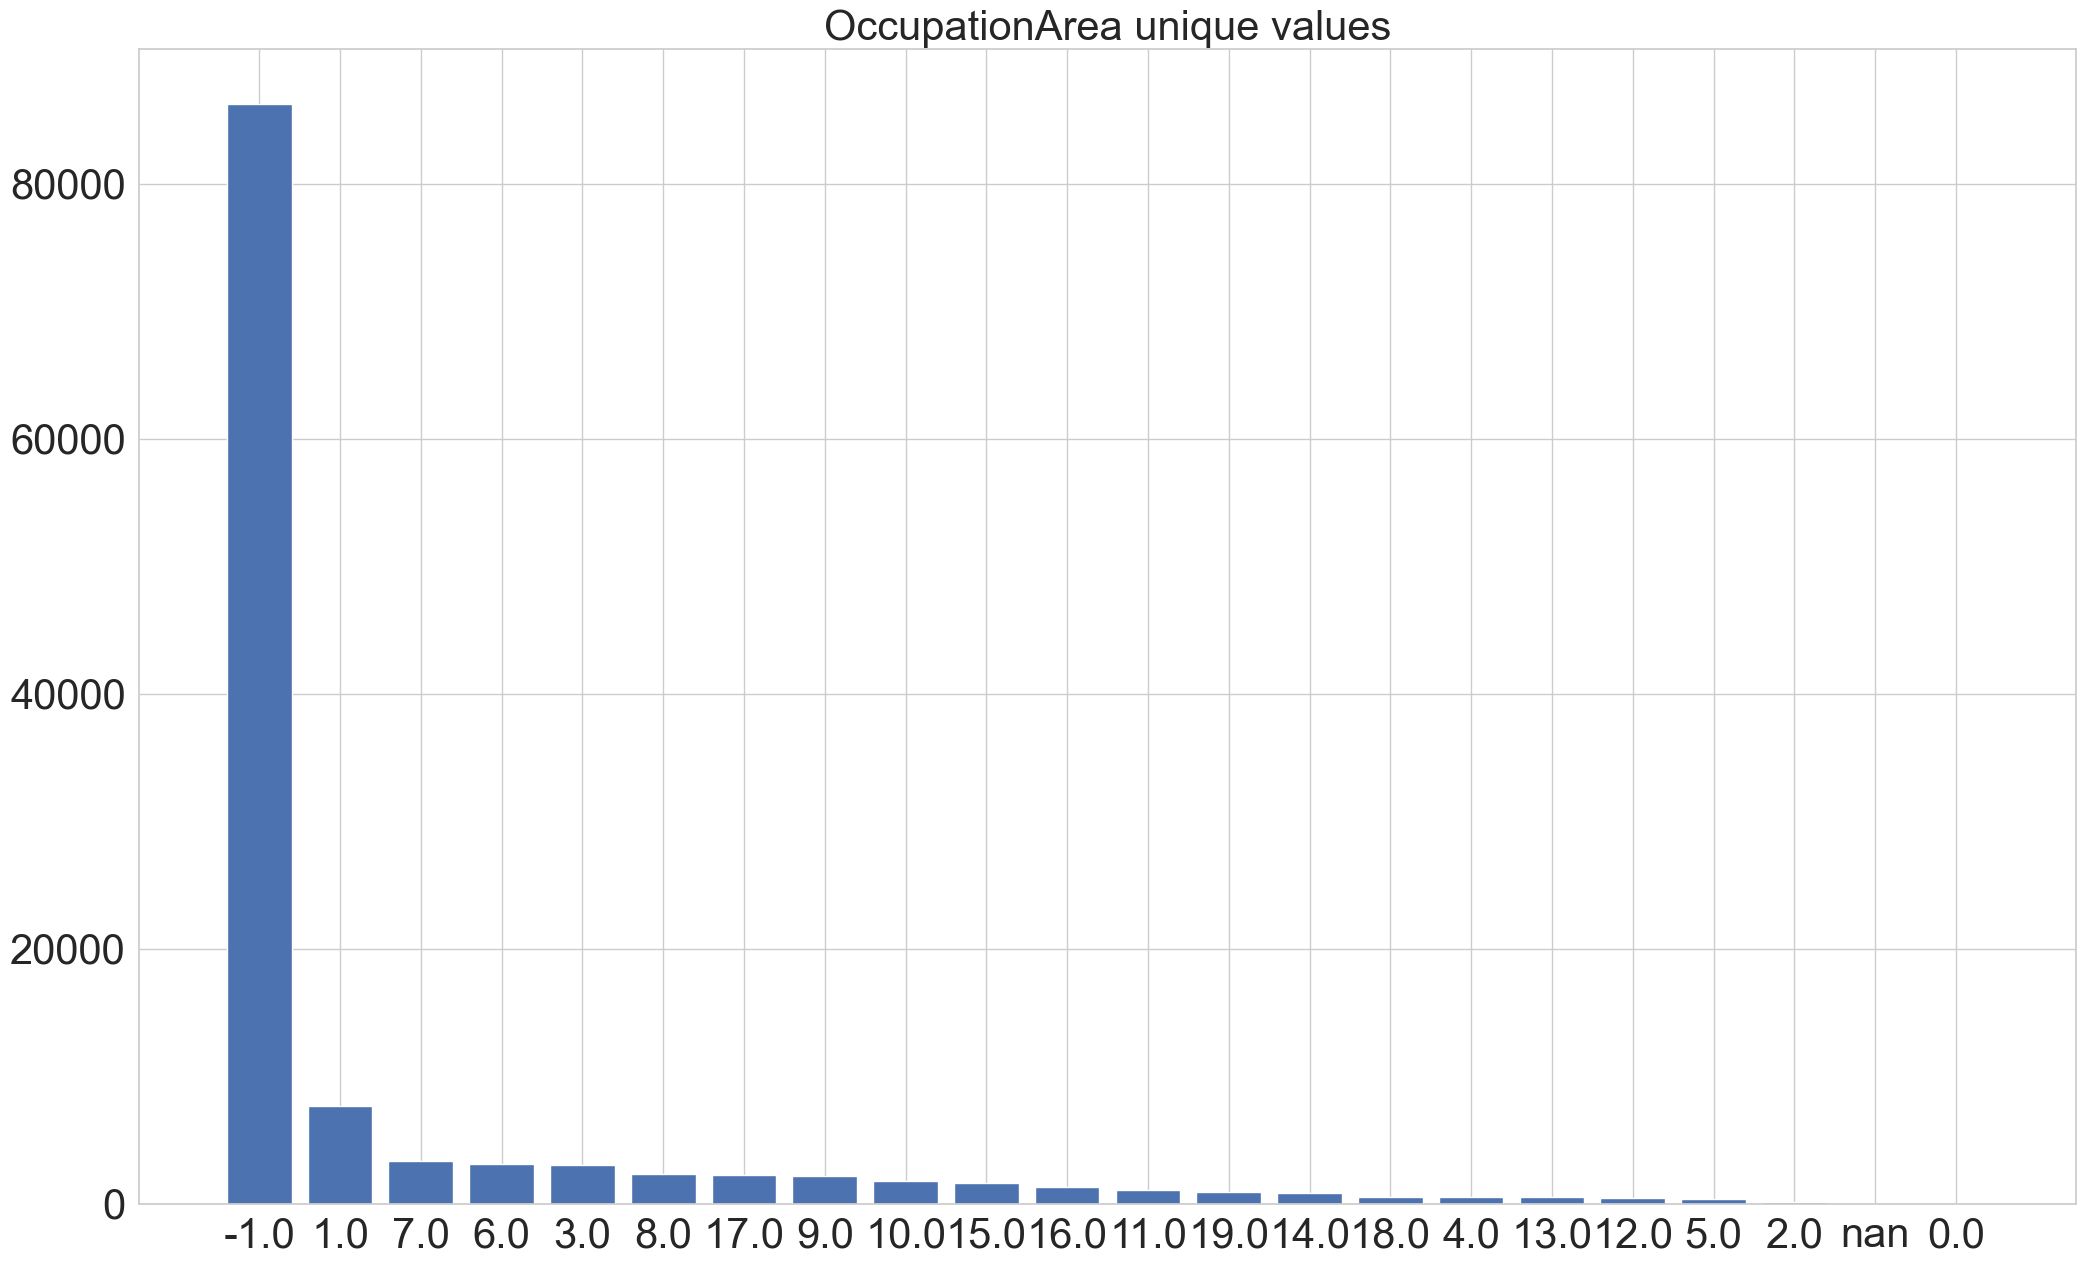

Count of '-1' in OccupationArea: 86246
Count of '0' in OccupationArea: 24
Count of '2' in OccupationArea: 1155


In [107]:
#OccupationArea
#value counts
counts = df['OccupationArea'].value_counts(dropna=False)
# Plot
plt.figure(figsize=(25,15))
plt.bar(counts.index.astype(str), counts.values)

plt.xticks(fontsize=30)  
plt.yticks(fontsize=30)

plt.title('OccupationArea unique values', fontsize=30)
plt.savefig("OccupationArea.png")
# Show the plot
plt.show()

print("Count of '-1' in OccupationArea:", value_counts.get(-1, 0))  
print("Count of '0' in OccupationArea:", value_counts.get(0, 0))    
print("Count of '2' in OccupationArea:", value_counts.get(2, 0))    

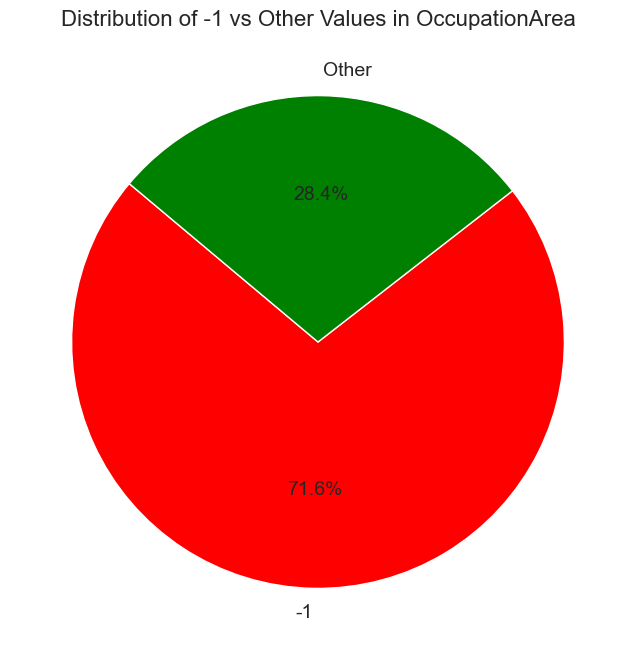

In [108]:
#value counts
counts = df['OccupationArea'].value_counts(dropna=False)

# Pie chart
labels = ['-1', 'Other']
minus_one_count = counts.get(-1, 0)
other_count = counts.drop(labels=[-1], errors='ignore').sum()  

# Create a list of counts for the pie chart
data = [minus_one_count, other_count]

plt.figure(figsize=(10, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14}, colors=['red', 'green'])
plt.title('Distribution of -1 vs Other Values in OccupationArea', fontsize=16)
plt.savefig("Pie_chart_OccupationArea.png")
plt.show()

In [109]:
#many missing values I will drop it
df=df.drop(columns=['OccupationArea'])

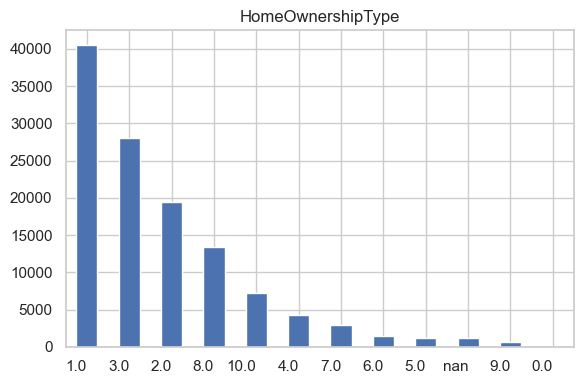

Count of '-1' in HomeOwnershipType: 0
Count of '0' in HomeOwnershipType: 31
Count of NaN values in 'HomeOwnershipType': 1164


In [110]:
#HomeOwnershipType
#value counts
value_counts = df['HomeOwnershipType'].value_counts(dropna=False)

plt.figure(figsize=(6, 4))  
ax = value_counts.plot(kind='bar')
ax.set_title('HomeOwnershipType')

plt.xticks(rotation=0, ha='right') 

plt.tight_layout()  
plt.savefig("HomeOwnershipType.png")
plt.show()

print("Count of '-1' in HomeOwnershipType:", value_counts.get(-1, 0))  
print("Count of '0' in HomeOwnershipType:", value_counts.get(0, 0))   
print("Count of NaN values in 'HomeOwnershipType':", value_counts.get(np.nan, 0))

In [111]:
# Drop rows where 'HomeOwnershipType' has NaN values
df = df.dropna(subset=['HomeOwnershipType'])

print("DataFrame shape after dropping rows with NaN in 'HomeOwnershipType':", df.shape)

DataFrame shape after dropping rows with NaN in 'HomeOwnershipType': (119265, 21)


In [112]:
#number of missing values in each column
missing_values = df.isnull().sum()

#percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Missing Values Count:\n", missing_values)

Missing Values Count:
 Age                                      0
Country                                  0
Education                                0
EmploymentDurationCurrentEmployer        0
IncomeTotal                              0
DebtToIncome                             0
AppliedAmount                            0
Amount                                   0
Interest                                 0
LoanDuration                             0
MonthlyPayment                        4786
VerificationType                         0
NoOfPreviousLoansBeforeLoan              0
AmountOfPreviousLoansBeforeLoan          0
PreviousRepaymentsBeforeLoan         39418
ExistingLiabilities                      0
LiabilitiesTotal                         0
NewCreditCustomer                        0
Status                                   0
HomeOwnershipType                        0
FreeCash                                 0
dtype: int64


In [113]:
#montlyPayment
df = df.dropna(subset=['MonthlyPayment'])

print("DataFrame shape after dropping rows with NaN in 'MonthlyPayment':", df.shape)

DataFrame shape after dropping rows with NaN in 'MonthlyPayment': (114479, 21)


In [114]:
value_counts=df['Status'].value_counts()
print(value_counts)

Late      68110
Repaid    46369
Name: Status, dtype: int64


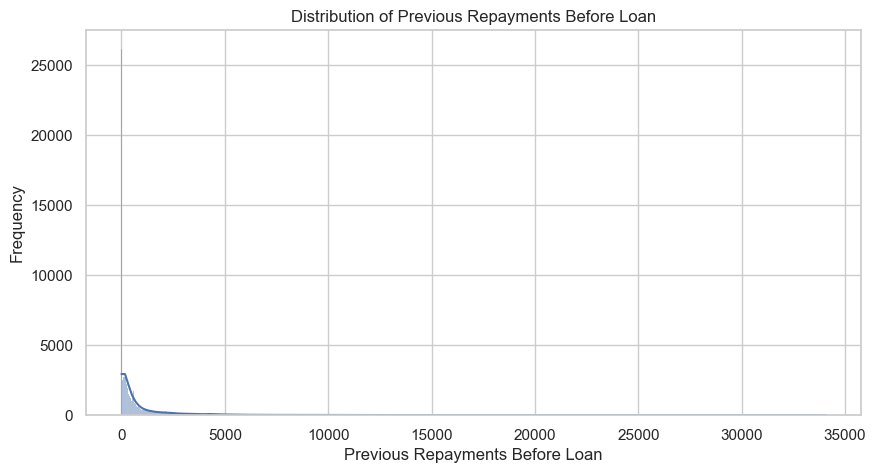

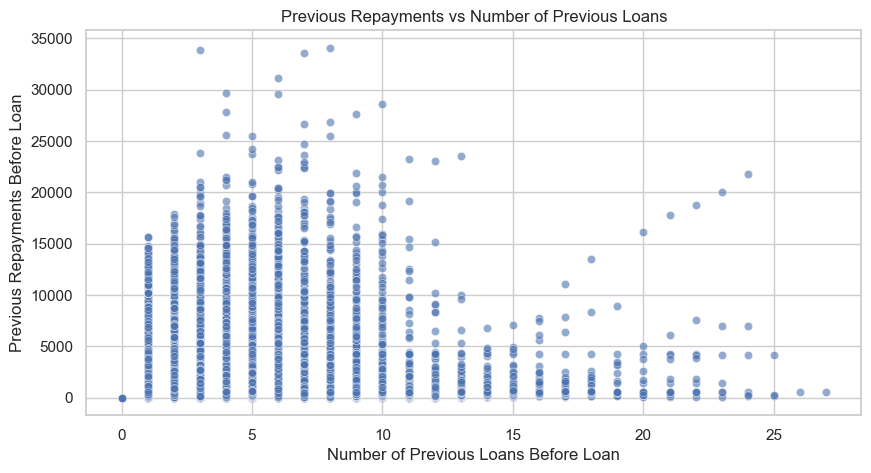

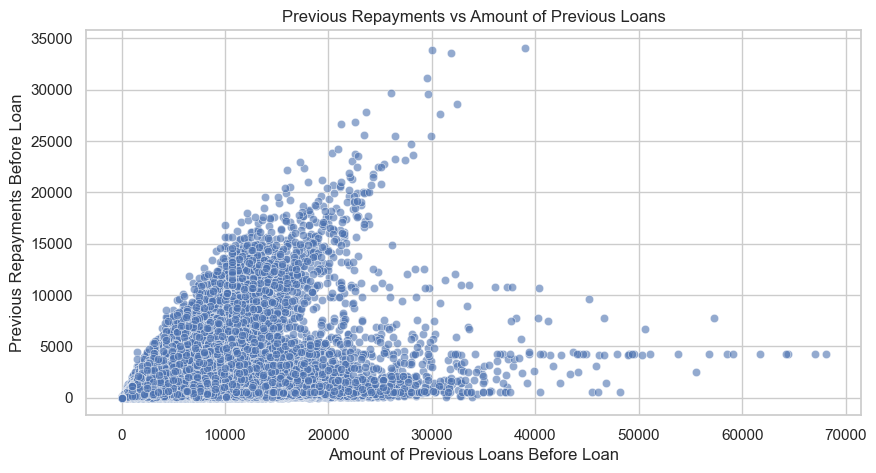

In [115]:
#previousrepaymentsbeforeloan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram to check the distribution of PreviousRepaymentsBeforeLoan
plt.figure(figsize=(10, 5))
sns.histplot(df['PreviousRepaymentsBeforeLoan'].dropna(), kde=True)  # KDE (Kernel Density Estimate) for smooth distribution curve
plt.title('Distribution of Previous Repayments Before Loan')
plt.xlabel('Previous Repayments Before Loan')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for PreviousRepaymentsBeforeLoan vs NoOfPreviousLoansBeforeLoan
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='NoOfPreviousLoansBeforeLoan', y='PreviousRepaymentsBeforeLoan', alpha=0.6)
plt.title('Previous Repayments vs Number of Previous Loans')
plt.xlabel('Number of Previous Loans Before Loan')
plt.ylabel('Previous Repayments Before Loan')
plt.savefig("PreviousRepayment_vs_NoOfPreviousLoans.png")
plt.show()

# Scatter plot for PreviousRepaymentsBeforeLoan vs AmountOfPreviousLoansBeforeLoan
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='AmountOfPreviousLoansBeforeLoan', y='PreviousRepaymentsBeforeLoan', alpha=0.6)
plt.title('Previous Repayments vs Amount of Previous Loans')
plt.xlabel('Amount of Previous Loans Before Loan')
plt.ylabel('Previous Repayments Before Loan')
plt.savefig("PreviousRepayment_vs_AmountOfPreviousLoans.png")
plt.show()
#No previousrepayments (zero) if NoOfPreviousLoansBeforeLoan=0

In [116]:
# Fill 0 where there are no previous loans
df.loc[df['NoOfPreviousLoansBeforeLoan'] == 0, 'PreviousRepaymentsBeforeLoan'] = 0
missing_values_count = df['PreviousRepaymentsBeforeLoan'].isnull().sum()
missing_values_count

4938

In [117]:
# Drop rows with missing values in 'PreviousRepaymentsBeforeLoan' column
df = df.dropna(subset=['PreviousRepaymentsBeforeLoan'])

# Check the shape of the DataFrame after dropping missing values
print("Shape of DataFrame after dropping missing values:", df.shape)

Shape of DataFrame after dropping missing values: (109541, 21)


In [118]:
df['NoOfPreviousLoansBeforeLoan']=df['NoOfPreviousLoansBeforeLoan'].astype(int)

In [119]:
value_counts=df['Status'].value_counts()
print(value_counts)

Late      65604
Repaid    43937
Name: Status, dtype: int64


In [120]:
#number of missing values in each column
missing_values = df.isnull().sum()

#percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Missing Values Count:\n", missing_values)

Missing Values Count:
 Age                                  0
Country                              0
Education                            0
EmploymentDurationCurrentEmployer    0
IncomeTotal                          0
DebtToIncome                         0
AppliedAmount                        0
Amount                               0
Interest                             0
LoanDuration                         0
MonthlyPayment                       0
VerificationType                     0
NoOfPreviousLoansBeforeLoan          0
AmountOfPreviousLoansBeforeLoan      0
PreviousRepaymentsBeforeLoan         0
ExistingLiabilities                  0
LiabilitiesTotal                     0
NewCreditCustomer                    0
Status                               0
HomeOwnershipType                    0
FreeCash                             0
dtype: int64


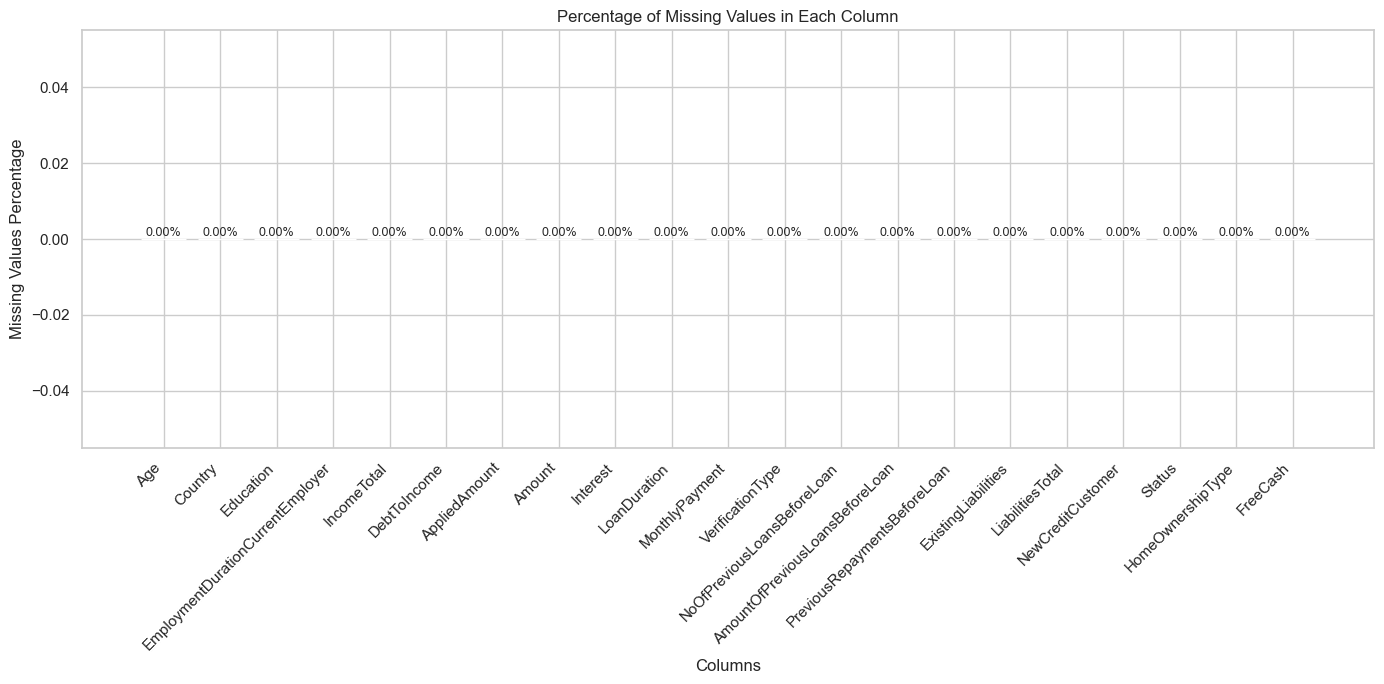

In [121]:
plt.figure(figsize=(14, 7))  
bars = plt.bar(missing_percentage.index, missing_percentage.values, color='salmon')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage')
plt.xticks(rotation=45, ha='right')  

# Adding text annotations above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=9)

# Adjust the margins and layout 
plt.subplots_adjust(bottom=0.15, top=0.85) 
plt.tight_layout()
plt.savefig("no_missing_each_column.png")
plt.show()

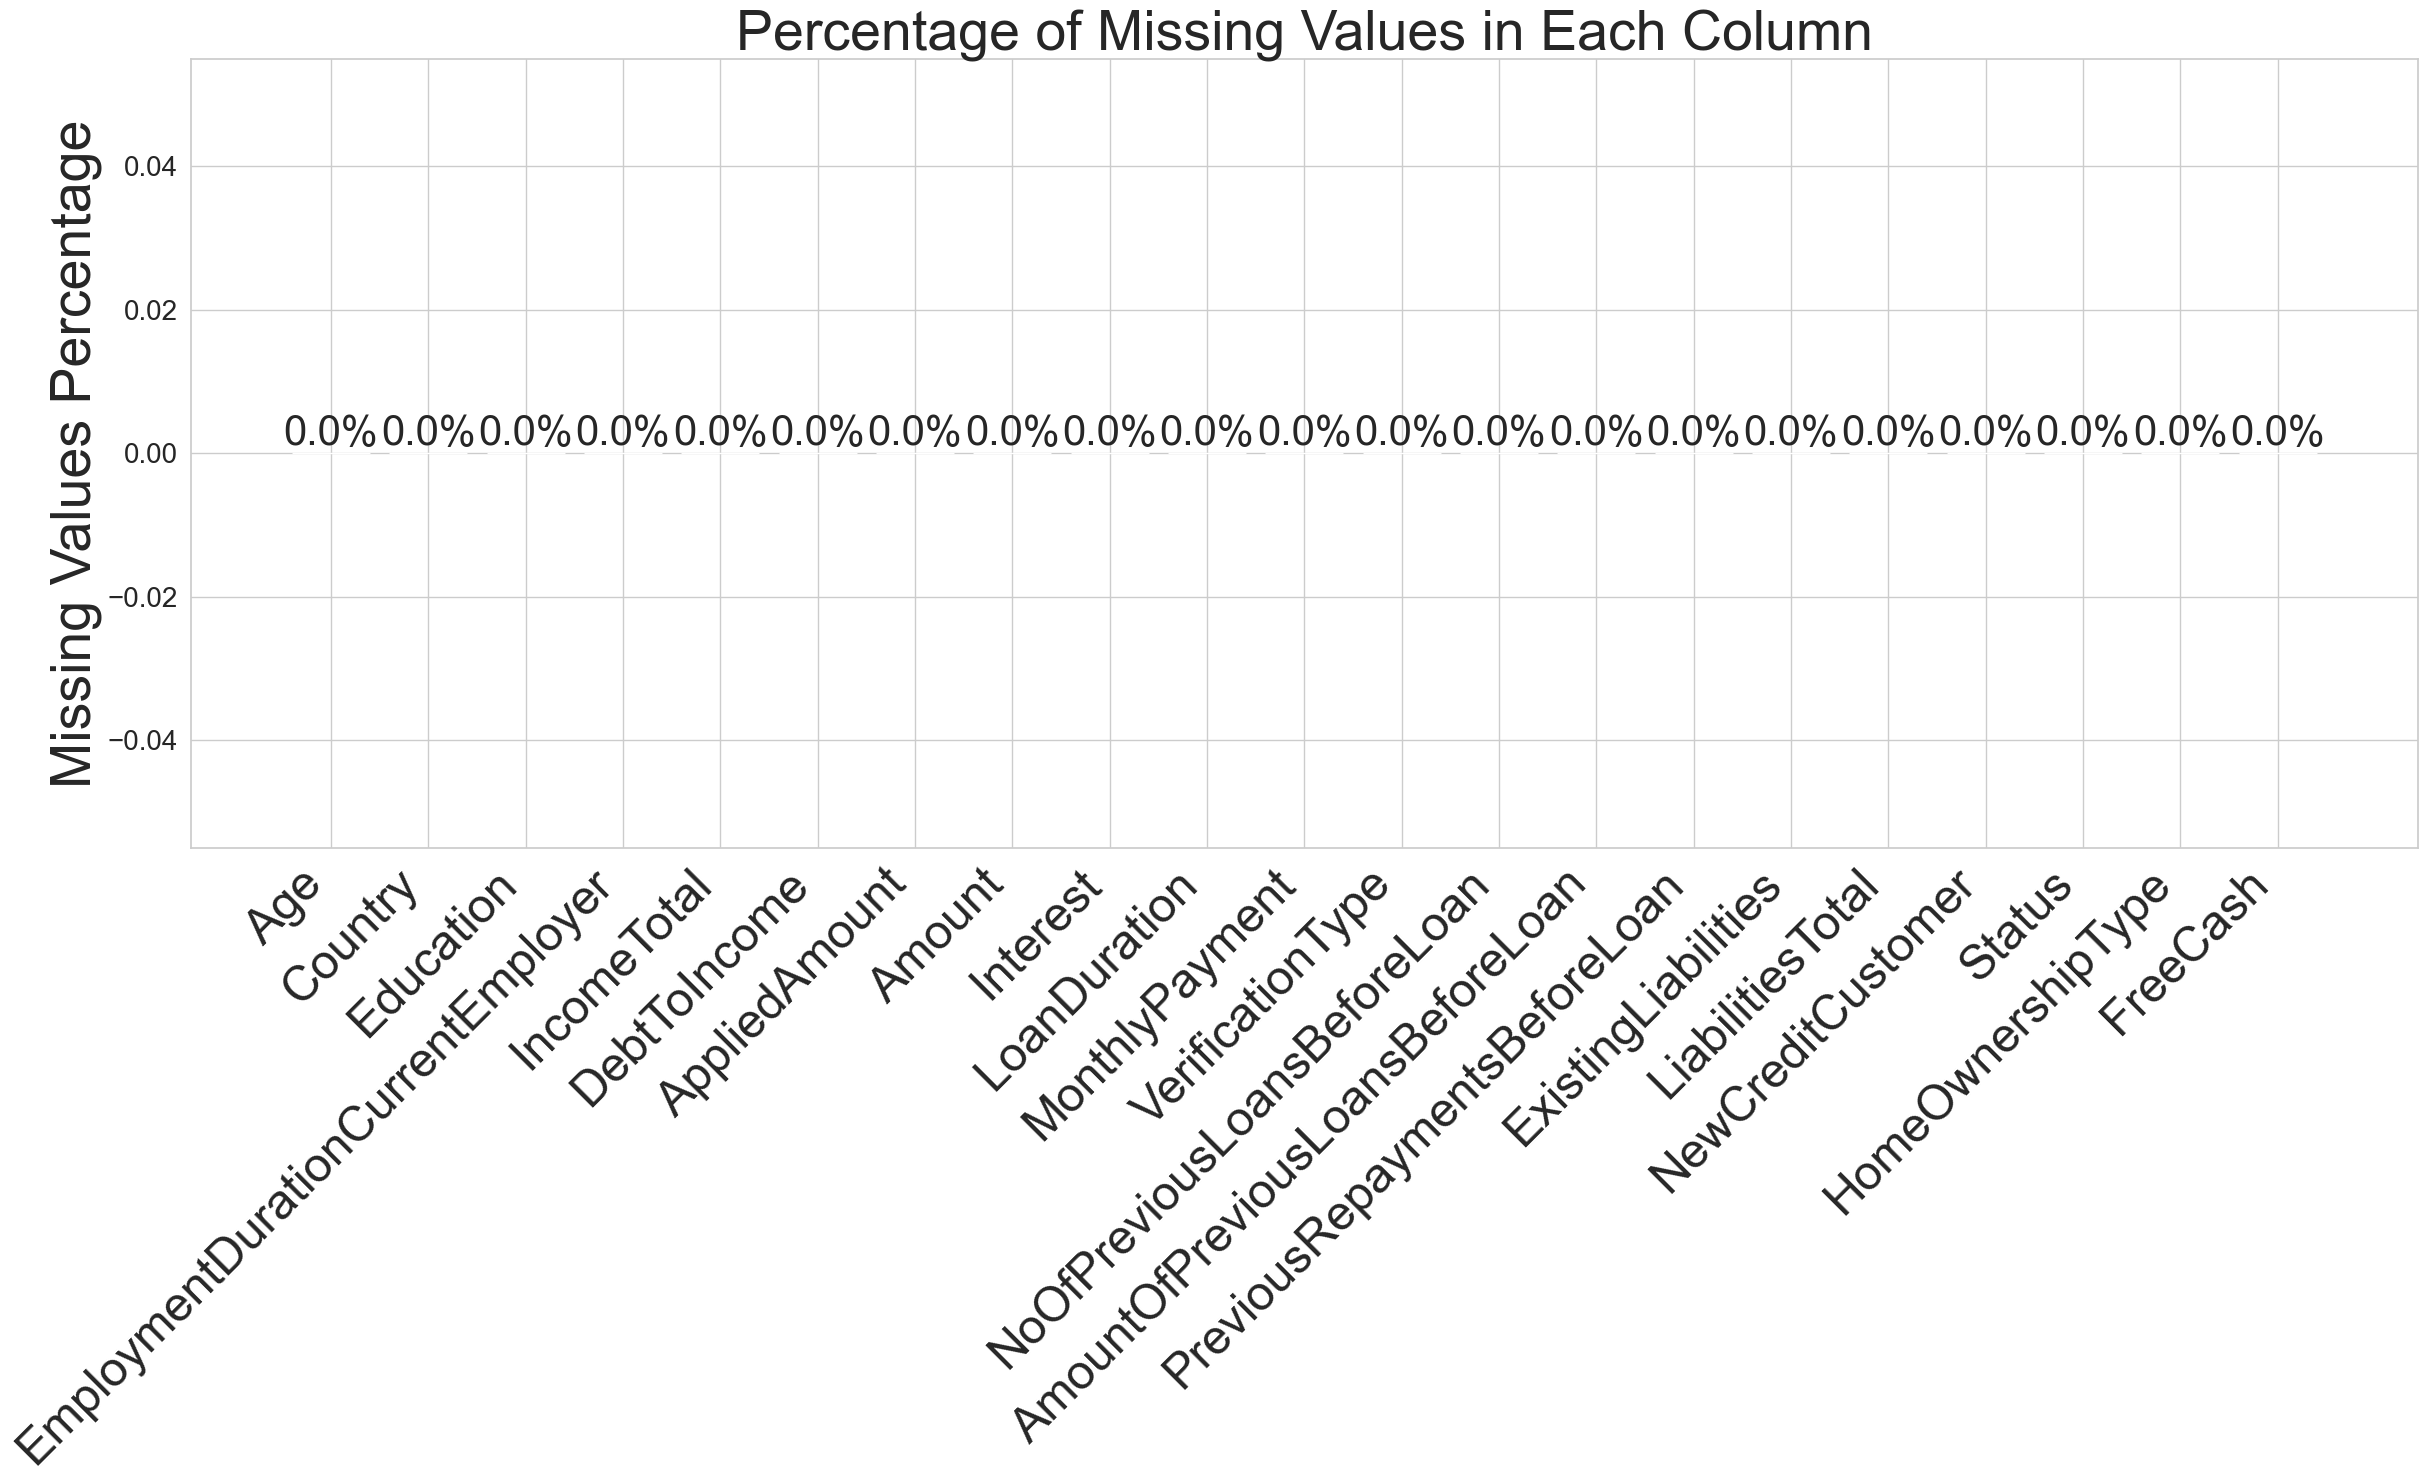

In [122]:
# Assuming 'missing_percentage' is a pandas Series with column names as index and percentage values as values
plt.figure(figsize=(25, 15)) 
bars = plt.bar(missing_percentage.index, missing_percentage.values, color='salmon')
plt.title('Percentage of Missing Values in Each Column', fontsize=40)
plt.ylabel('Missing Values Percentage', fontsize=40)
plt.xticks(rotation=45, ha='right', fontsize=35)  
plt.yticks(fontsize=20)
# Adding text annotations above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=30)

# Adjust the margins and layout 
plt.subplots_adjust(bottom=0.15, top=10.18) 
plt.tight_layout()
plt.savefig("no_missing_each_column.png")
plt.show()

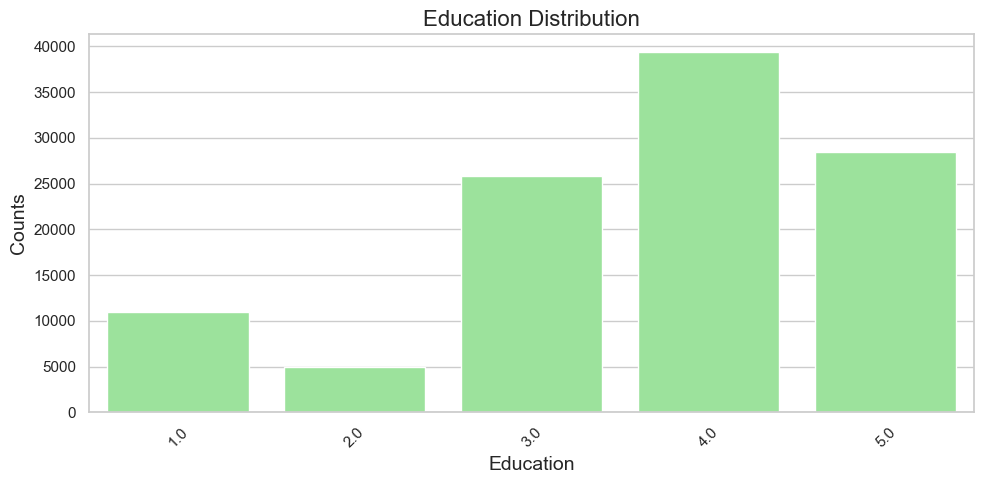

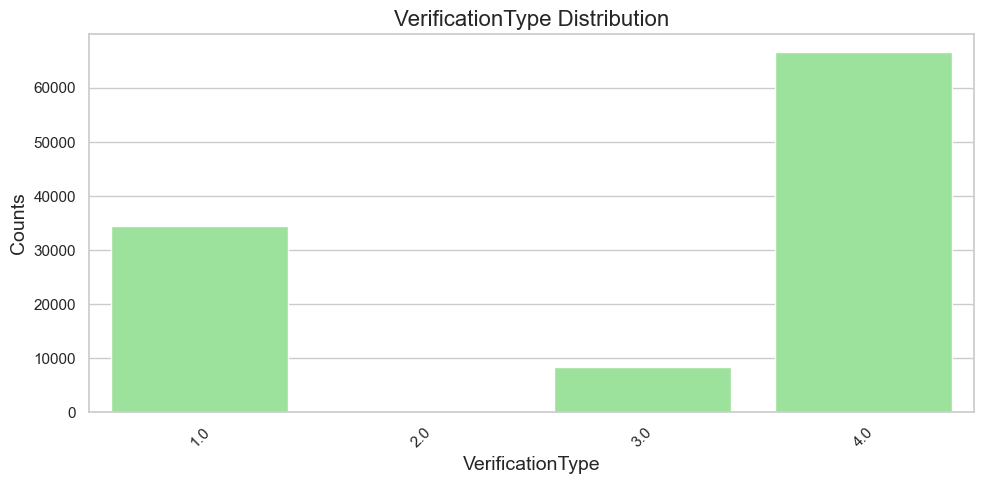

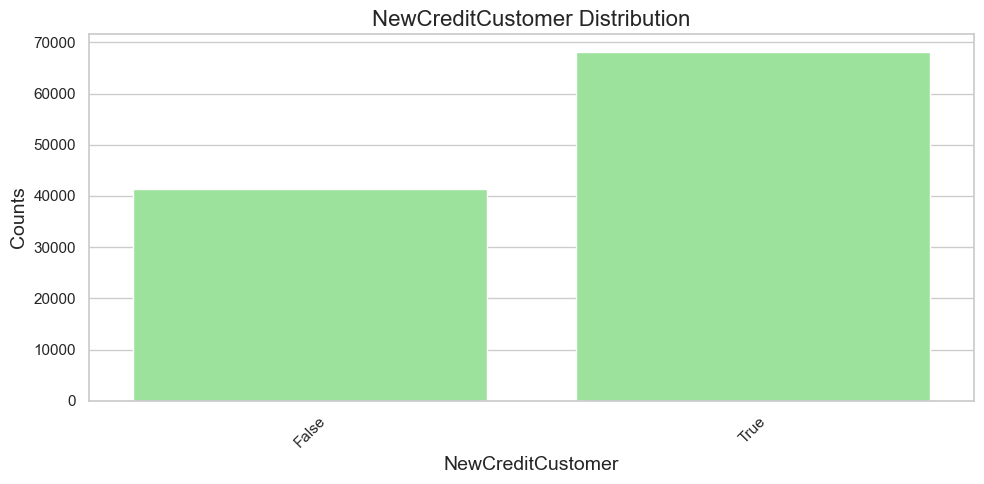

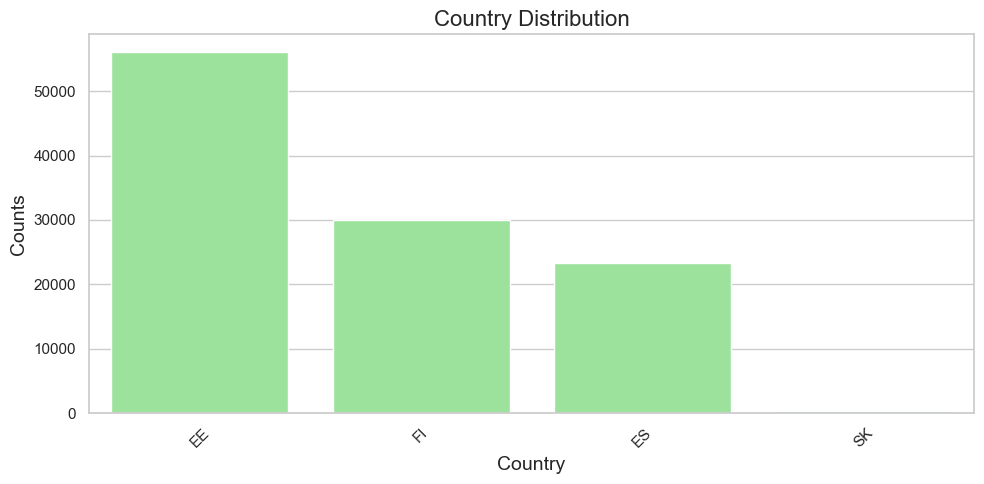

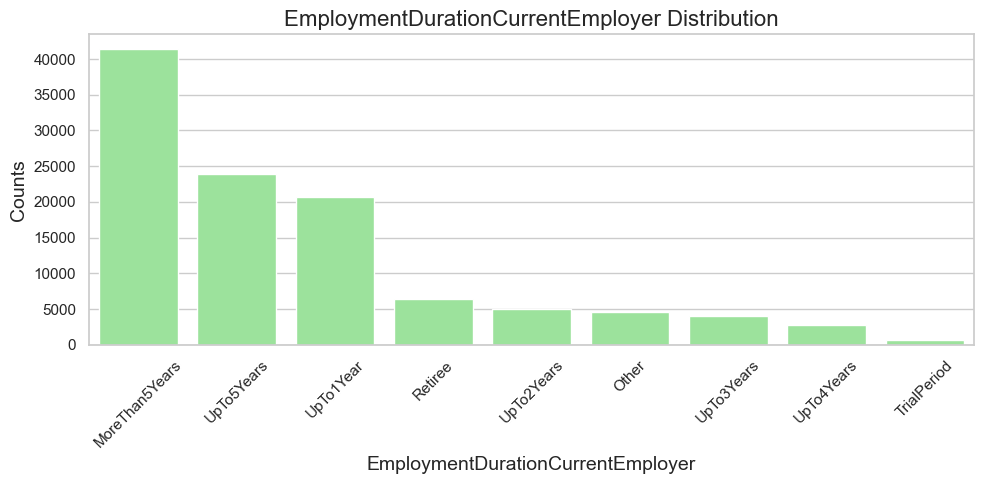

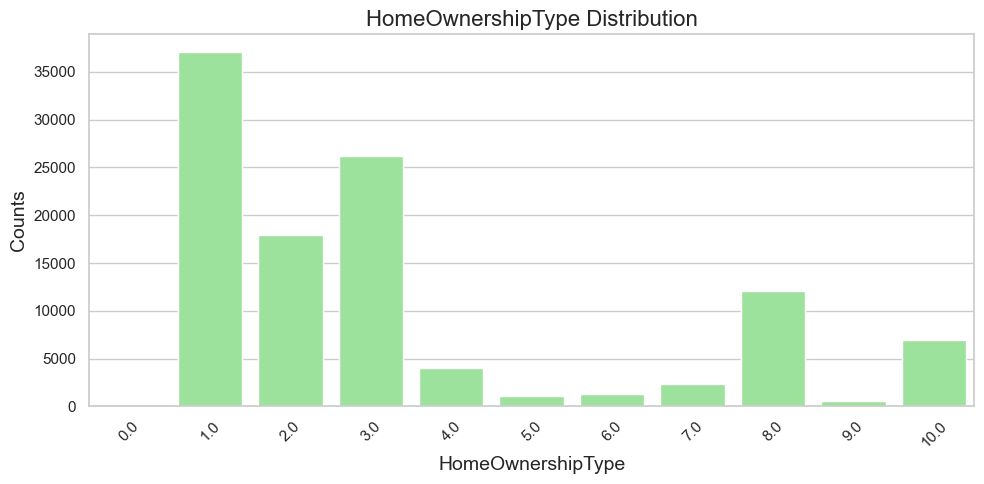

In [123]:
sns.set(style="whitegrid")

# List of variables
variables = ['Education', 'VerificationType', 'NewCreditCustomer', 'Country', 'EmploymentDurationCurrentEmployer', 'HomeOwnershipType']

# Iterate through the list of variables and create a bar plot for each
for var in variables:
    plt.figure(figsize=(10, 5))
    data = df[var].fillna('Unknown').value_counts()
    ax = sns.barplot(x=data.index, y=data.values, color='lightgreen')
    ax.set_title(f'{var} Distribution', fontsize=16)
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{var}_distribution_before_encoding.png', dpi=300)
    plt.show()
    plt.close() 

In [124]:
##Country
#unique values in the 'Country' column
country_values = df['Country'].unique()

print("Unique countries in the dataset:", country_values)
# Apply one-hot encoding to the Country column
df = pd.get_dummies(df, columns=['Country'])

Unique countries in the dataset: ['EE' 'ES' 'FI' 'SK']


In [125]:
#Education . I will leave like that as the values have ordinal relationship
#unique values in the 'Education' column
educ_values = df['Education'].unique()

print("Unique countries in the dataset:", educ_values)
#as type int
df['Education']=df['Education'].astype(int)

Unique countries in the dataset: [4. 5. 2. 3. 1.]


In [126]:
#EmploymentDurationCurrentEmployer 
df = pd.get_dummies(df, columns=['EmploymentDurationCurrentEmployer'])

In [127]:
#VerificationType from float to int
df['VerificationType'] = df['VerificationType'].astype(int)

In [128]:
#NewCreditCustomer
df['NewCreditCustomer'] = df['NewCreditCustomer'].astype(int)

In [129]:
#Status 
#Map 'late' to 1 (default) and 'repaid' to 0 (non-default)
df['Status'] = df['Status'].map({'Late': 1, 'Repaid': 0})

print(df['Status'].head())

0    1
1    1
2    0
3    1
4    1
Name: Status, dtype: int64


In [130]:
#HomeOwnershipType
# Map 
mapping = {0: 'Homeless',
    1: 'Owner',
    2: 'Living_with_Parents',
    3: 'Tenant_pre_furnished_property',
    4: 'Tenant_unfurnished_property',
    5: 'Council_house ',
    6: 'Joint_tenant',
    7: 'Joint_ownership',
    8: 'Mortgage',
    9: 'Owner_with_encumbrance',
    10: 'Other'
}
df['HomeOwnershipType'] = df['HomeOwnershipType'].replace(mapping)
df = pd.get_dummies(df, columns=['HomeOwnershipType'])

In [131]:
df.head()

,Age,Education,IncomeTotal,DebtToIncome,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,VerificationType,...,HomeOwnershipType_Homeless,HomeOwnershipType_Joint_ownership,HomeOwnershipType_Joint_tenant,HomeOwnershipType_Living_with_Parents,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Owner,HomeOwnershipType_Owner_with_encumbrance,HomeOwnershipType_Tenant_pre_furnished_property,HomeOwnershipType_Tenant_unfurnished_property
0,53,4,354.0,26.29,2125.0,2125.0,20.97,60,62.05,4,...,0,0,0,0,0,0,1,0,0,0
1,50,5,900.0,30.58,3000.0,3000.0,17.12,60,84.75,1,...,0,0,0,0,0,0,1,0,0,0
2,44,4,1200.0,26.71,10630.0,9100.0,13.67,60,268.57,4,...,0,0,0,0,1,0,0,0,0,0
3,42,2,863.0,7.36,1500.0,1500.0,40.40,60,63.53,3,...,0,0,0,1,0,0,0,0,0,0
4,34,4,697.0,36.04,1595.0,1090.0,68.39,48,101.19,4,...,0,0,0,0,0,0,0,0,1,0


In [132]:
df.dtypes

Age                                                   int64
Education                                             int32
IncomeTotal                                         float64
DebtToIncome                                        float64
AppliedAmount                                       float64
Amount                                              float64
Interest                                            float64
LoanDuration                                          int64
MonthlyPayment                                      float64
VerificationType                                      int32
NoOfPreviousLoansBeforeLoan                           int32
AmountOfPreviousLoansBeforeLoan                     float64
PreviousRepaymentsBeforeLoan                        float64
ExistingLiabilities                                   int64
LiabilitiesTotal                                    float64
NewCreditCustomer                                     int32
Status                                  

In [133]:
counts = df['Status'].value_counts()

print(counts)


1    65604
0    43937
Name: Status, dtype: int64


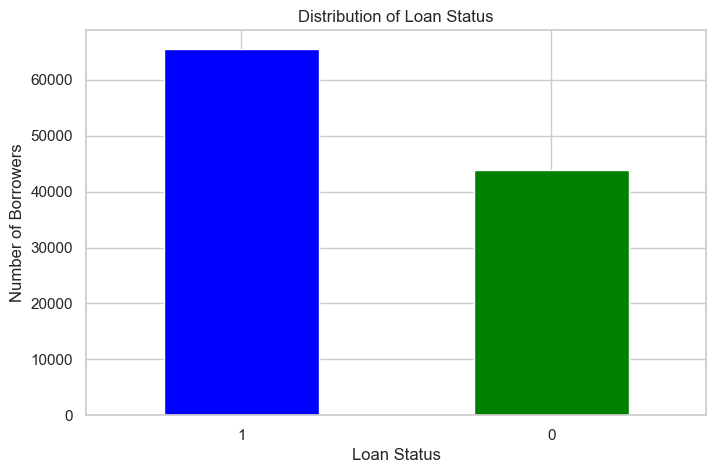

In [134]:
# Create a bar plot for the status counts
plt.figure(figsize=(8, 5))  # Set the figure size
counts.plot(kind='bar', color=['blue', 'green', 'purple'])  # Set custom colors for each status
plt.xlabel('Loan Status')  # Label for X-axis
plt.ylabel('Number of Borrowers')  # Label for Y-axis
plt.title('Distribution of Loan Status')  # Title of the plot
plt.xticks(rotation=0)  # Set the rotation of X-axis labels to 0 for better readability
plt.savefig('Loan_status_distribution_FINAL.png')
plt.show()  # Display the plot

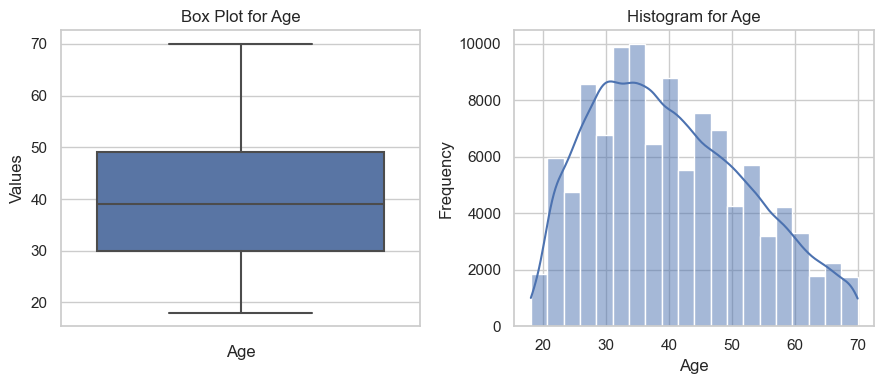

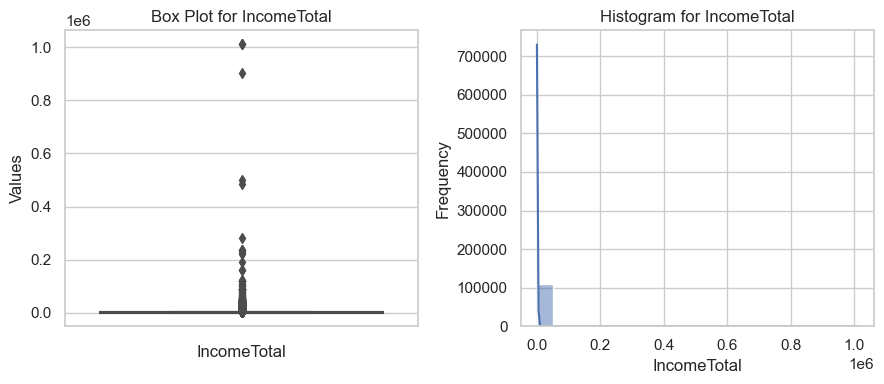

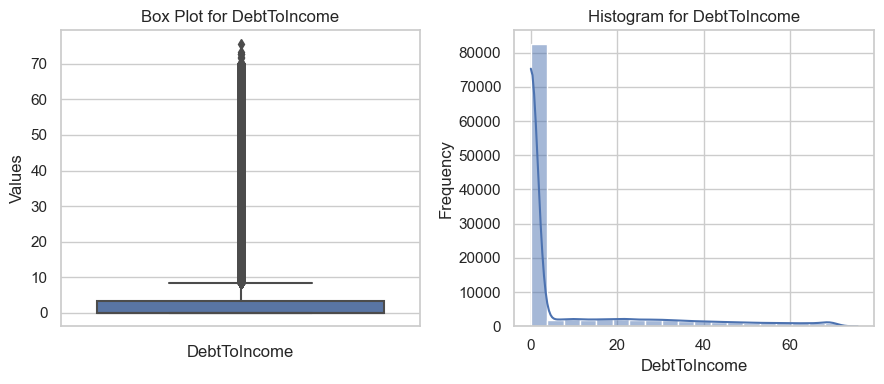

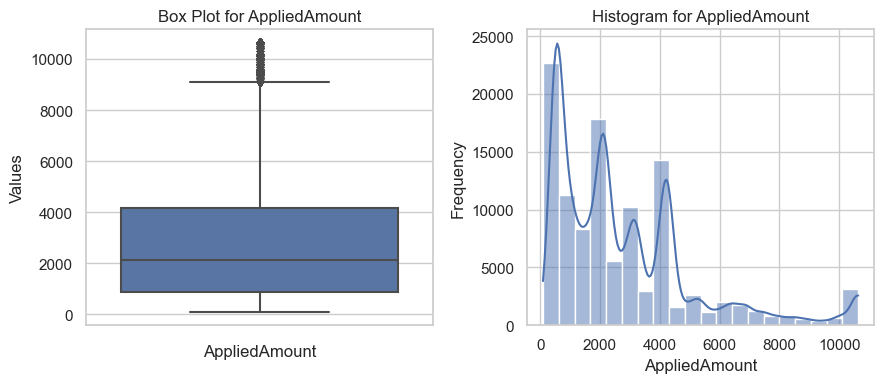

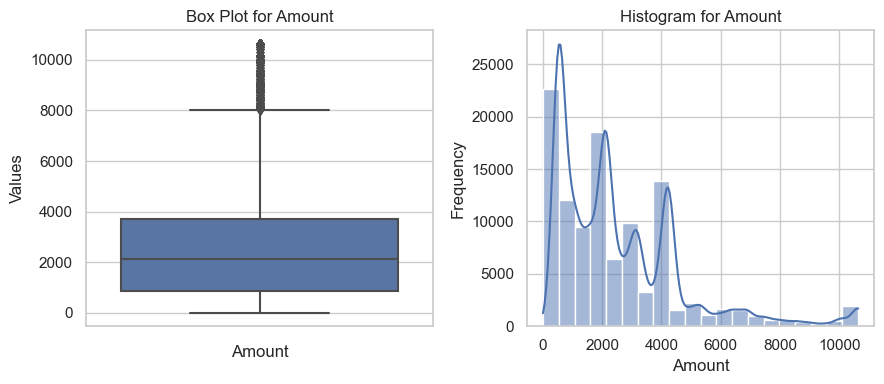

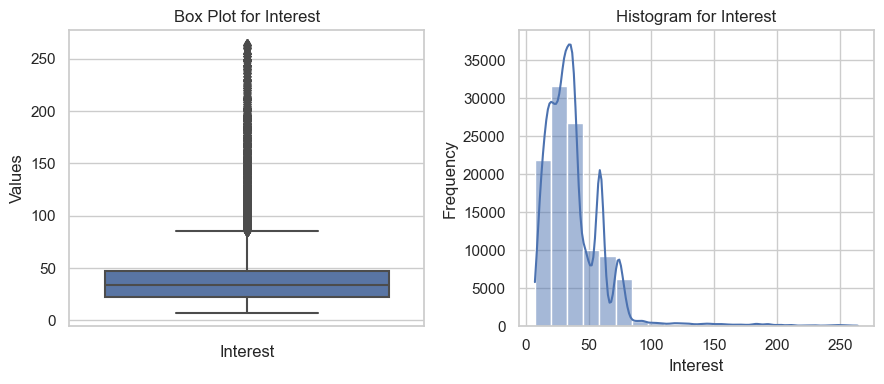

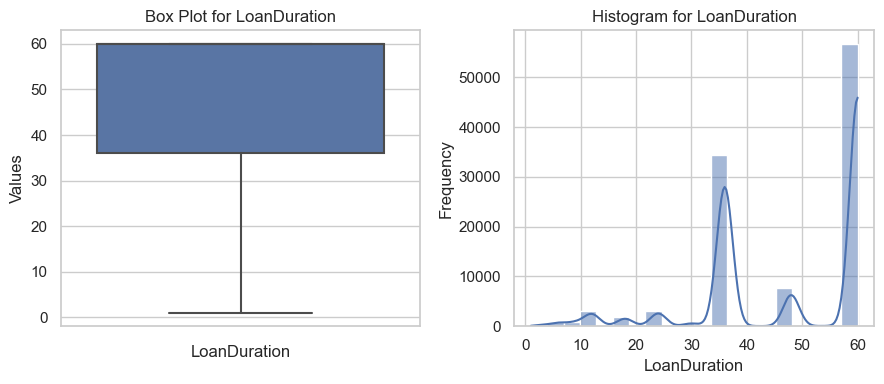

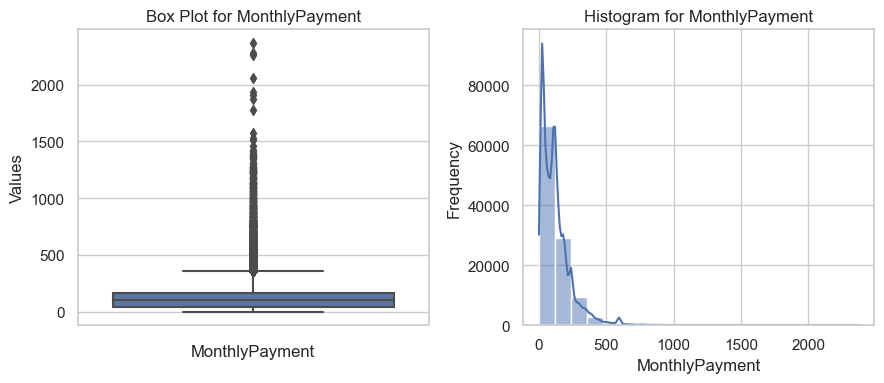

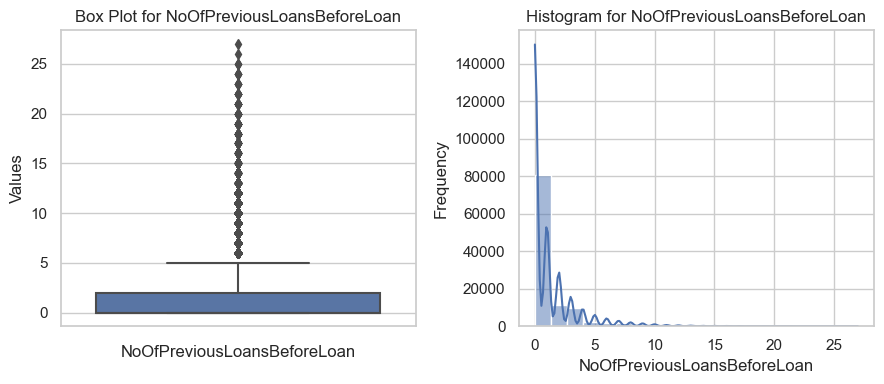

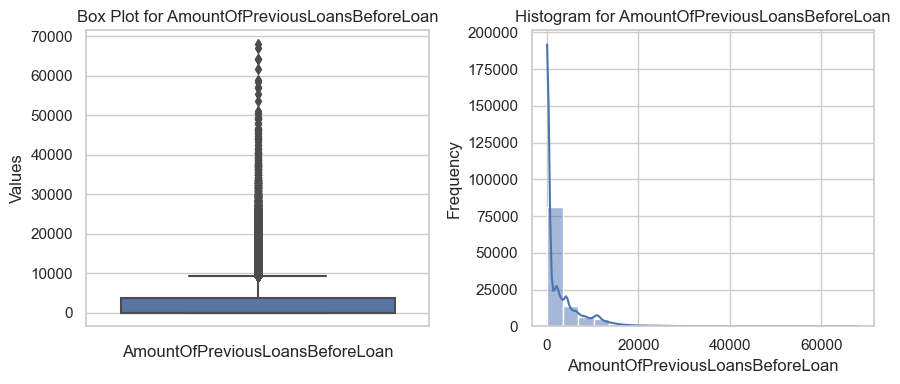

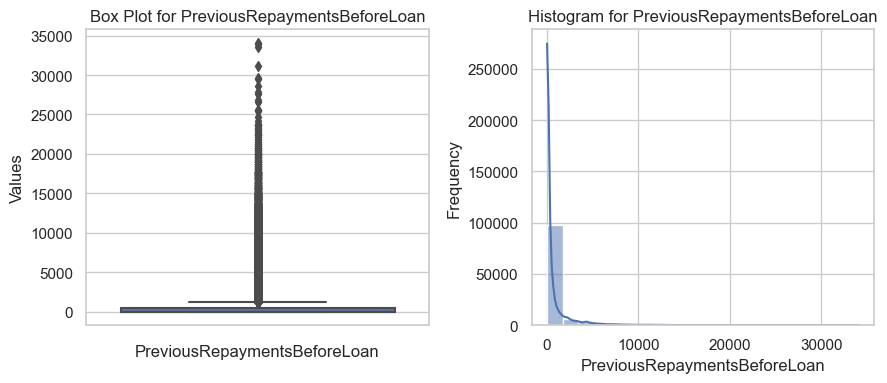

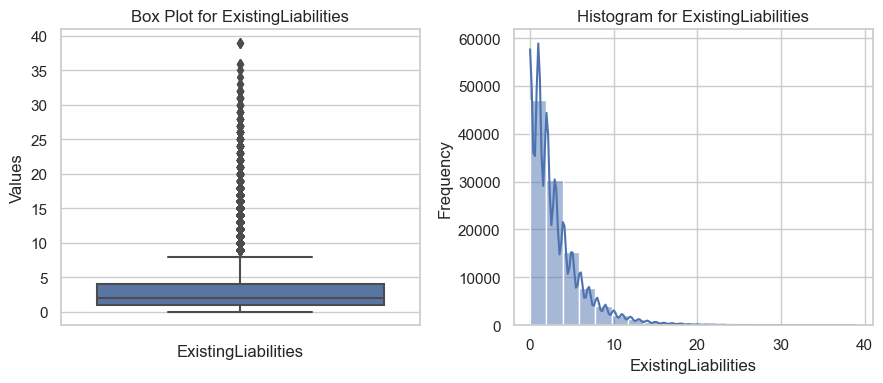

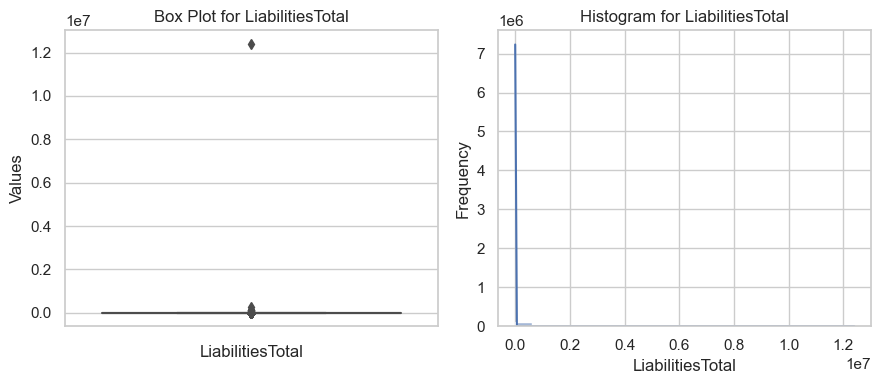

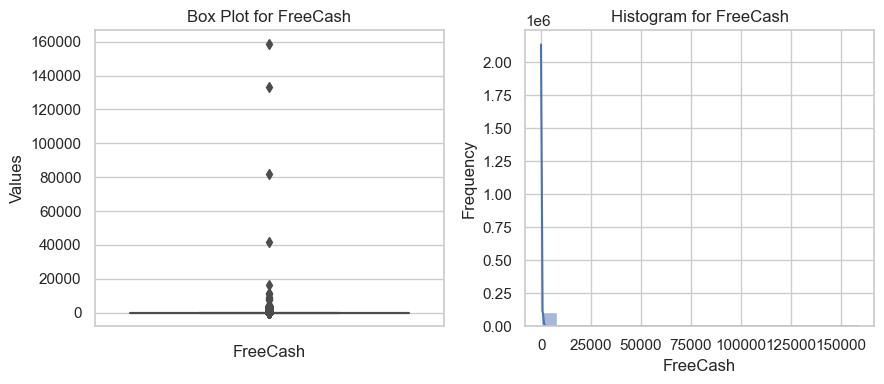

In [135]:

import os
directory = 'plots'
if not os.path.exists(directory):
    os.makedirs(directory)

#Boxplots for integer/numeric variables
numeric_variables = ['Age', 'IncomeTotal', 'DebtToIncome', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 
                     'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'ExistingLiabilities',
                     'LiabilitiesTotal', 'FreeCash']
        
# Loop through each variable to create and save plots
for var in numeric_variables:
    plt.figure(figsize=(9, 4))  
    
    # Create a boxplot on the left
    plt.subplot(1, 2, 1)  
    sns.boxplot(y=var, data=df)
    plt.title(f'Box Plot for {var}')
    plt.xlabel(var)
    plt.ylabel('Values')
    
    # Create a histogram on the right
    plt.subplot(1, 2, 2)
    sns.histplot(x=var, data=df, bins=20, kde=True)  
    plt.title(f'Histogram for {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    
    
    plt.tight_layout()  
    plt.savefig(f'{directory}/{var}_plots.png', dpi=300)  
    plt.show()
    plt.close() 

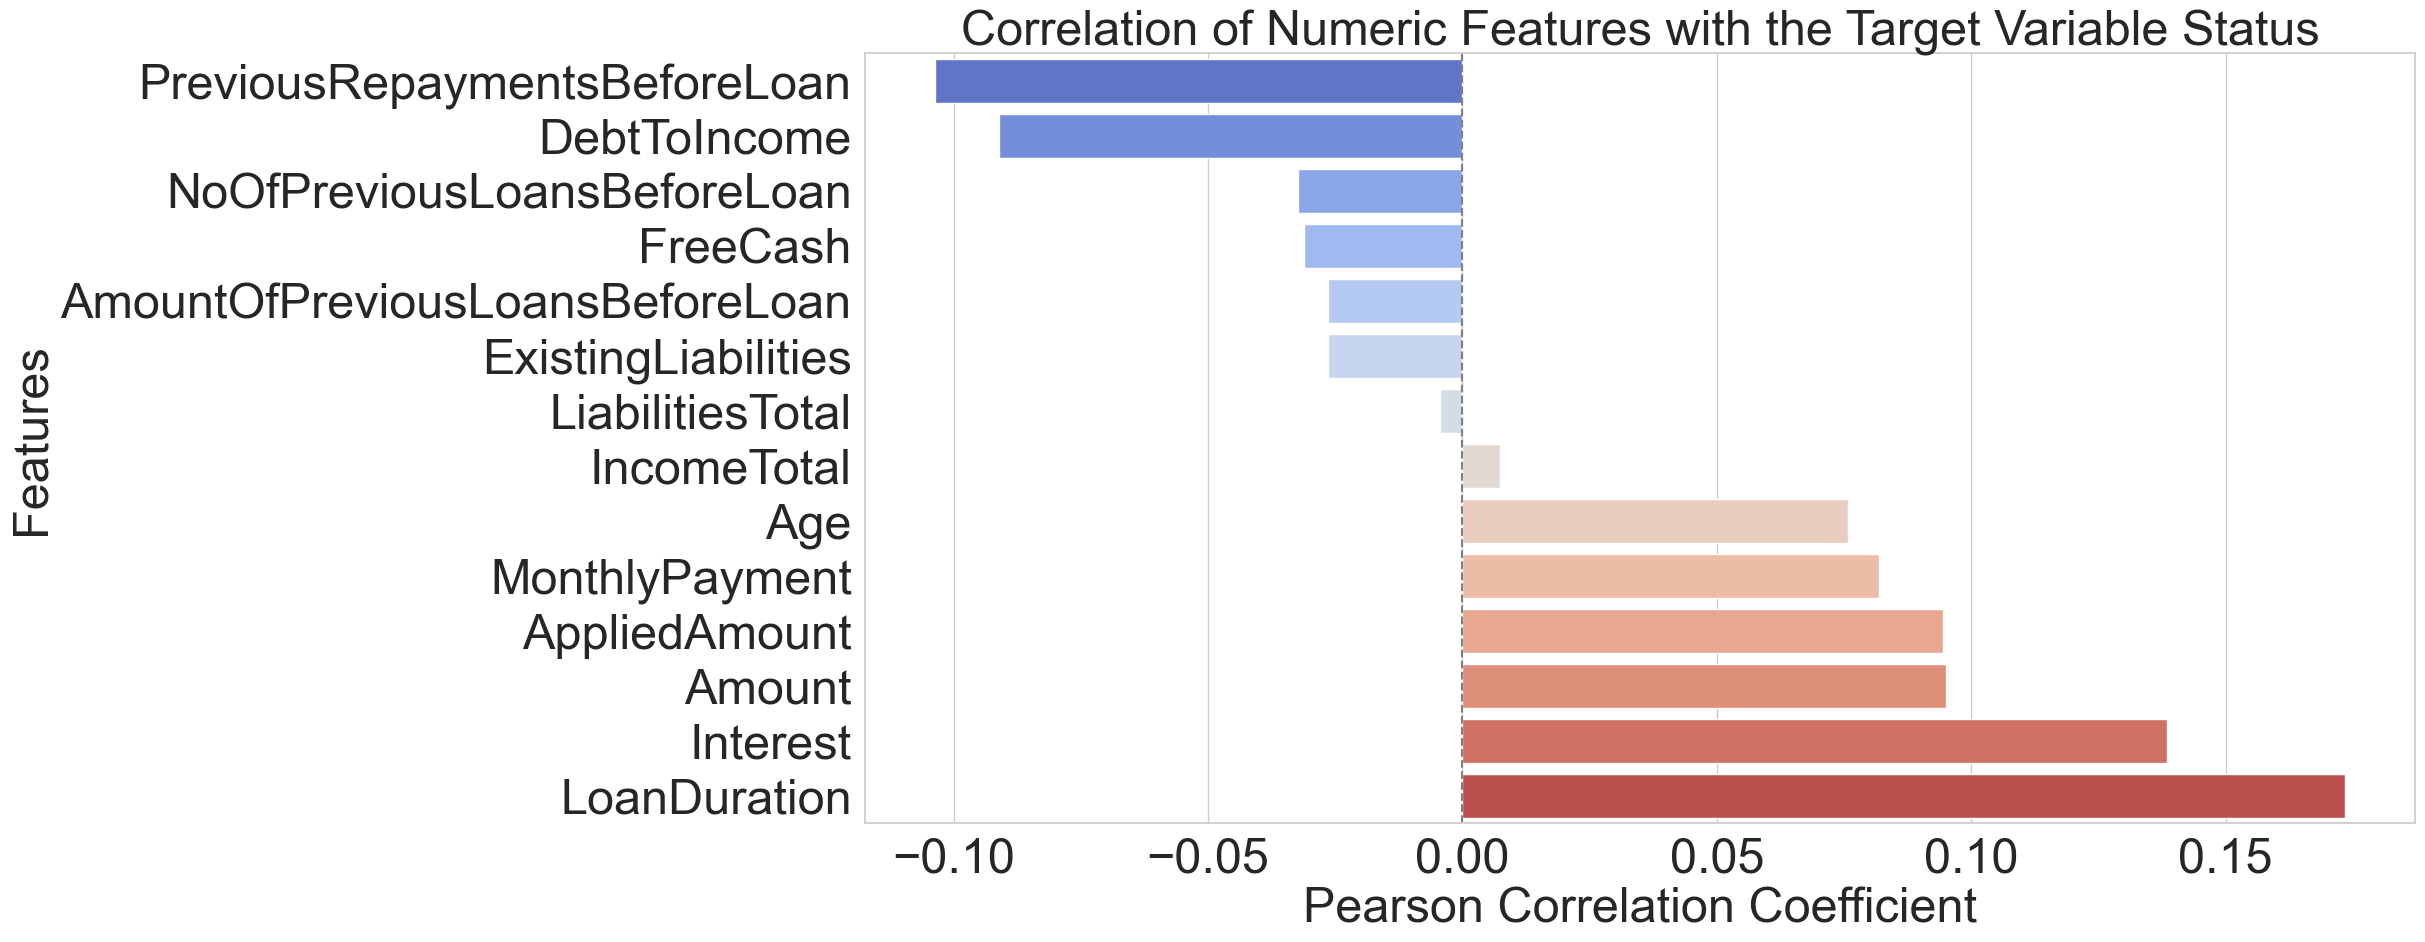

In [178]:
variables = ['Age', 'IncomeTotal', 'DebtToIncome', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
             'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'ExistingLiabilities',
             'LiabilitiesTotal', 'FreeCash', 'Status']
df_selected = df[variables]

# Calculating correlation with the target variable 'Status'
correlation_with_status = df_selected.corr()['Status'].drop('Status') 

# Sorting the values to make the plot more informative
correlation_with_status_sorted = correlation_with_status.sort_values()

# Creating the plot
plt.figure(figsize=(20, 10))  
sns.barplot(x=correlation_with_status_sorted.values, y=correlation_with_status_sorted.index, palette='coolwarm')

# Adding labels and title for clarity
plt.xlabel('Pearson Correlation Coefficient', fontsize=35)
plt.ylabel('Features', fontsize=35)
plt.rc('ytick', labelsize=35)  
plt.rc('xtick', labelsize=35)  
plt.rc('axes', titlesize=35)   
plt.title('Correlation of Numeric Features with the Target Variable Status', fontsize=35)
plt.axvline(x=0, color='grey', linestyle='--')  
plt.savefig("Correlation of numeric Features with Target Variable Status", bbox_inches='tight')
plt.show()

In [66]:
import os
#directory to save plots
plot_directory = 'one_hot_plots'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

#one-hot encoded variables
one_hot_encoded_variables = ['Country_EE','Country_ES','Country_FI','Country_SK',
                           'HomeOwnershipType_Homeless','HomeOwnershipType_Owner','HomeOwnershipType_Living_with_Parents',
                            'HomeOwnershipType_Tenant_pre_furnished_property','HomeOwnershipType_Tenant_unfurnished_property',
                            'HomeOwnershipType_Council_house ','HomeOwnershipType_Joint_tenant','HomeOwnershipType_Joint_ownership',
                             'HomeOwnershipType_Mortgage','HomeOwnershipType_Owner_with_encumbrance','HomeOwnershipType_Other', 
                             'EmploymentDurationCurrentEmployer_MoreThan5Years','EmploymentDurationCurrentEmployer_Other',    
                            'EmploymentDurationCurrentEmployer_Retiree', 'EmploymentDurationCurrentEmployer_TrialPeriod',     
                           'EmploymentDurationCurrentEmployer_UpTo1Year','EmploymentDurationCurrentEmployer_UpTo2Years', 
                             'EmploymentDurationCurrentEmployer_UpTo3Years', 'EmploymentDurationCurrentEmployer_UpTo4Years',         
                             'EmploymentDurationCurrentEmployer_UpTo5Years']

#bar plots for each one-hot encoded variable
for var in one_hot_encoded_variables:
    plt.figure(figsize=(10, 6)) 
    sns.countplot(x=var, data=df)
    plt.title(f'Bar Plot for {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    
    # Save the figure
    plt.savefig(f'{plot_directory}/{var}_bar_plot.png', dpi=300)
    plt.close() 

In [67]:
X = df.drop("Status", axis=1)  
y = df["Status"]  

In [68]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#Resampling with SMOTE, ADASYN
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

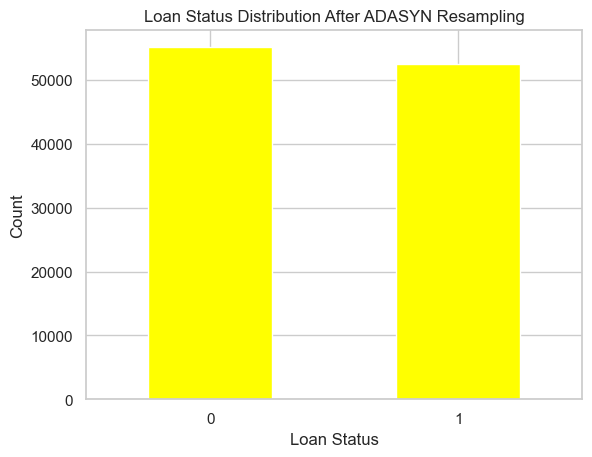

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the resampled labels into a DataFrame for easy counting
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Status'])

#occurrences of each class
status_counts = y_train_resampled_df['Status'].value_counts()

#bar chart
status_counts.plot(kind='bar', color='yellow')
plt.title('Loan Status Distribution After ADASYN Resampling')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.savefig("Loan Status Distribution After ADASYN Resampling.png")
plt.show()

In [70]:
df.to_csv('df_FINAL.csv', index=False)